# PROJECT - CREDIT CARD FRAUD DETECTION

## OVERVIEW
This project aims to develop and evaluate machine learning models for predicting fraudulent credit card transactions. The goal is to build a robust model that can effectively identify fraudulent activities while minimizing false positives and negatives, which is crucial for financial institutions and their customers. The project addresses the challenge of class imbalance inherent in fraud detection datasets.

In [ ]:
# Importing necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np

# Importing libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing warnings to ignore potential warnings
import warnings
warnings.filterwarnings('ignore')

# Setting seed for reproducibility
set_seed = 120

# Setting pandas display options for better readability of dataframes
pd.set_option('display.max_columns', 500)

### Data Loading and Initial Exploration


In [ ]:
# Reading the credit card transaction dataset into a pandas DataFrame
df = pd.read_csv('creditcard.csv')

# Displaying the first 5 rows of the DataFrame to get a glimpse of the data
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Shape and Information

In [ ]:
# Printing the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", df.shape)

# Printing detailed information about the dataset, including column data types and non-null counts
print("\nDataset Information:")
df.info()

Shape of the dataset: (284807, 31)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  floa

### Descriptive Statistics

In [ ]:
# Displaying descriptive statistics for numerical columns, providing insights into central tendency, dispersion, and shape of the distribution
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Handling Missing Values

In [ ]:
# Checking the percentage of missing values in each column
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)

# Displaying the percentage of missing values per column
print("\nPercentage of missing values per column:")
display(df_missing_columns)


Percentage of missing values per column:


,null
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


Note: Since there are no missing values, this step is not necessary, but included for reference purpose.

In [ ]:
# Dropping rows with any missing values. Since the percentage of missing values is very small,
# dropping these rows is a reasonable approach to handle them without significant data loss.
df.dropna(inplace=True)

# Verifying that missing values are handled by checking the total number of missing values in the DataFrame
print("\nChecking for missing values after dropping rows:")
display(df.isnull().sum().sum())


Checking for missing values after dropping rows:


np.int64(0)

### Class Distribution Analysis
Analyze the class distribution and visualize it to understand the imbalance.

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Percentage of Non-Fraudulent Transactions: 99.83
Percentage of Fraudulent Transactions: 0.17


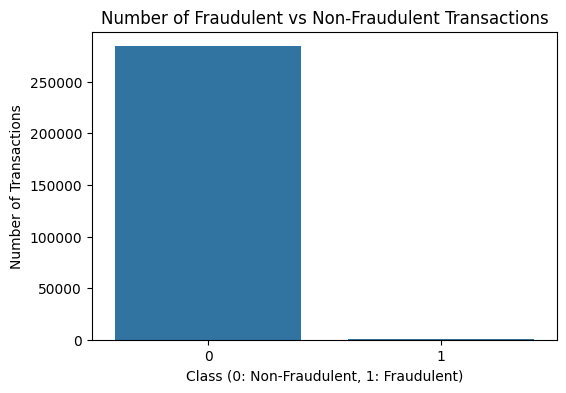

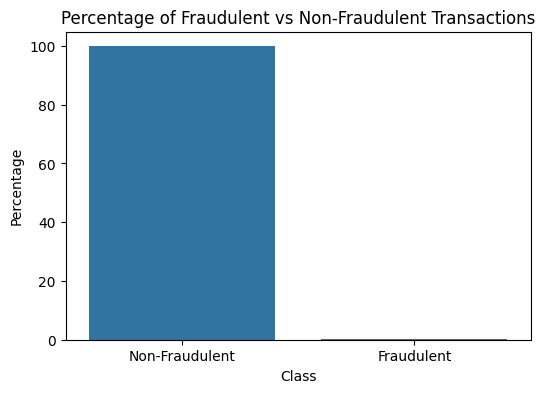

In [ ]:
# Checking the distribution of the target variable 'Class' (0: Non-Fraudulent, 1: Fraudulent)
classes = df['Class'].value_counts()
print("Class Distribution:\n", classes)

# Calculating the percentage of each class for better understanding of the imbalance
normal_share = round((classes[0]/df['Class'].count()*100),2)
fraud_share = round((classes[1]/df['Class'].count()*100),2)

print("\nPercentage of Non-Fraudulent Transactions:", normal_share)
print("Percentage of Fraudulent Transactions:", fraud_share)

# Creating a bar plot to visualize the number of fraudulent vs non-fraudulent transactions
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Number of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Number of Transactions')
plt.show()

# Creating a DataFrame for the percentage of fraudulent vs non-fraudulent transactions
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)

# Creating a bar plot to visualize the percentage of fraudulent vs non-fraudulent transactions
plt.figure(figsize=(6,4))
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

### Outlier Treatment

- The dataset features V1-V28 are already PCA transformed, which is assumed to handle outliers.
- Therefore, no explicit outlier treatment will be performed on these features.
- The 'Amount' feature, while not PCA transformed, will be scaled later, which can mitigate the impact of some outliers.

## Observe the distribution of classes with time and amount

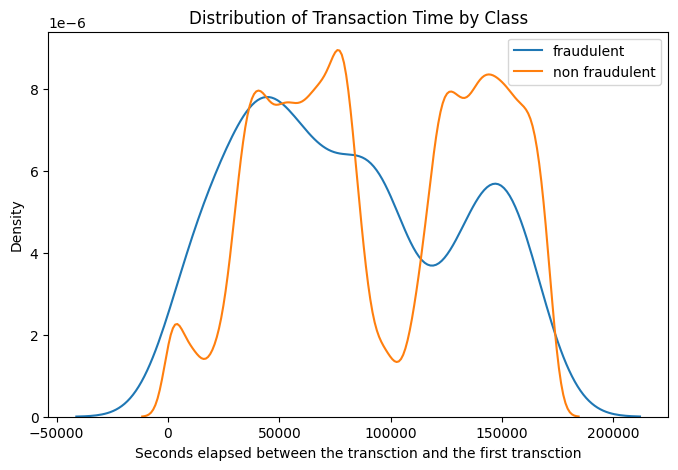

In [ ]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.title('Distribution of Transaction Time by Class')
plt.legend()
plt.show()

In [ ]:
# Dropping the 'Time' column as the distribution analysis did not reveal a clear pattern differentiating fraudulent and non-fraudulent transactions based on time.
df.drop('Time', axis=1, inplace=True)

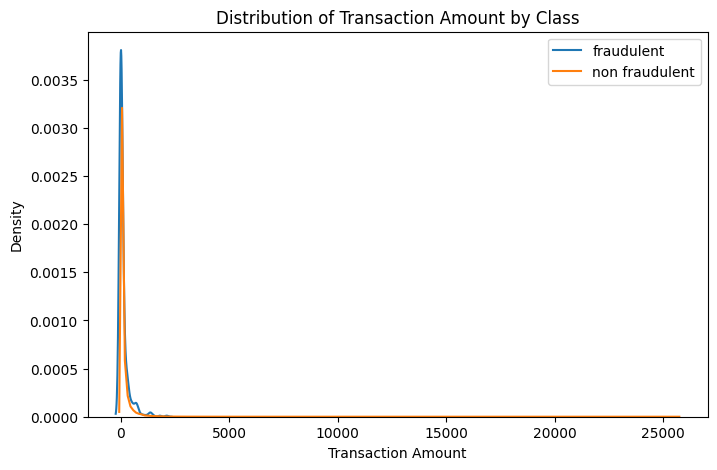

In [ ]:
# Creating separate DataFrames for fraudulent and non-fraudulent transactions for visualization
data_fraud = df[df['Class'] == 1]
data_non_fraud = df[df['Class'] == 0]

# Creating a distribution plot to visualize the distribution of transaction amounts for both classes
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Amount'],label='non fraudulent',hist=False)
ax.set(xlabel='Transaction Amount')
plt.title('Distribution of Transaction Amount by Class')
plt.legend()
plt.show()

### Data Splitting and Feature Scaling
Before training the models, we split the data into training and testing sets and scale the 'Amount' feature.

In [ ]:
# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Separating feature variables (X) and the target variable (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

# Splitting the data into training and testing sets with an 80:20 ratio.
# stratify=y ensures that the proportion of the target variable 'Class' is the same
# in both the training and testing sets, which is important for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100, stratify=y)

### Feature Scaling
Scaling the 'Amount' column is necessary because it is not PCA transformed like the V1-V28 features. We will use standardization to scale this feature.

In [ ]:
# Importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming the 'Amount' column
# We fit only on the training data to avoid data leakage from the test set
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])


# Displaying the first few rows of the training data after scaling the 'Amount' column
display(X_train.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
211885,-1.137612,2.345154,-1.767247,0.833982,0.973168,-0.073571,0.802433,0.733137,-1.154087,-0.520340,0.494117,0.799935,0.494576,-0.479666,-0.917177,-0.184117,1.189459,0.937244,0.960749,0.062820,0.114953,0.430613,-0.240819,0.124011,0.187187,-0.402251,0.196277,0.190732,-0.195896
12542,-1.028649,1.141569,2.492561,-0.242233,0.452842,-0.384273,1.256026,-0.816401,1.964560,-0.014216,0.432153,-2.140921,2.274477,0.114128,-1.652894,-0.617302,0.243791,-0.426168,-0.493177,0.350032,-0.380356,-0.037432,-0.503934,0.407129,0.604252,0.233015,-0.433132,-0.491892,-0.325535
270932,-1.121864,-0.195099,1.282634,-3.172847,-0.761969,-0.287013,-0.586367,0.496182,-2.352349,0.350551,-1.319688,-0.942001,1.082210,-0.425735,0.036748,0.380392,-0.033353,0.204609,-0.801465,-0.113632,-0.328953,-0.856937,-0.056198,0.401905,0.406813,-0.440140,0.152356,0.030128,-0.193726
30330,1.094238,-0.760568,-0.392822,-0.611720,-0.722850,-0.851978,-0.185505,-0.095131,-1.122304,0.367009,1.378493,-0.724216,-1.105406,-0.480170,0.220826,1.745743,0.740817,-0.728827,1.016740,0.354148,-0.227392,-1.254285,0.022116,-0.141531,0.114515,-0.652427,-0.037897,0.051254,0.311857
272477,2.278095,-1.298924,-1.884035,-1.530435,-0.649500,-0.996024,-0.466776,-0.438025,-1.612665,1.631133,-1.126000,-0.938760,0.300621,-0.119667,-0.585453,-1.106244,0.690235,-0.124401,-0.075649,-0.341708,0.123892,0.815909,-0.072537,0.784217,0.403428,0.193747,-0.043185,-0.058719,-0.113379


#### Scaling the Test Set
It is important to only transform the test set using the scaler fitted on the training set to avoid data leakage.

In [ ]:
# Transforming the 'Amount' column in the test set using the scaler fitted on the training set
X_test['Amount'] = scaler.transform(X_test[['Amount']])

# Displaying the first few rows of the test data after scaling the 'Amount' column
display(X_test.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
248750,0.046622,1.529678,-0.453615,1.282569,1.110333,-0.882716,1.046420,-0.117121,-0.679897,-0.923709,0.371519,-0.000047,0.512255,-2.091762,0.786796,0.159652,1.706939,0.458922,0.037665,0.240559,-0.338472,-0.839547,0.066527,0.836447,0.076790,-0.775158,0.261012,0.058359,-0.279296
161573,0.145870,0.107484,0.755127,-0.995936,1.159107,2.113961,0.036200,0.471777,0.627622,-0.598398,0.713816,1.091294,0.663878,-0.448057,0.146422,-0.445603,-0.462439,-0.373996,-0.966334,-0.107332,0.297644,1.285809,-0.140560,-0.910706,-0.449729,-0.235203,-0.036910,-0.227111,-0.314287
65893,-1.434413,-0.469604,1.816518,0.650913,-0.569395,0.851560,-0.796770,0.760209,-1.369018,0.086289,-1.614272,-0.210000,0.959659,-0.169720,1.110324,-1.636073,0.381255,1.726039,-0.137539,0.032530,-0.033991,0.017976,-0.062151,-0.769157,0.291469,0.011709,0.029830,-0.080522,0.095523
12836,1.216532,-0.314522,1.134570,0.302071,-1.047467,-0.226341,-0.808963,0.011571,2.484110,-0.749128,-0.113215,-2.463177,1.217232,1.078202,-0.353184,0.264467,0.560170,0.070299,0.162726,-0.101807,-0.289677,-0.451358,0.021372,0.025676,0.112433,0.974426,-0.067625,0.007633,-0.260937
132224,1.033697,-0.059268,0.169109,1.067405,-0.093840,0.106697,-0.037664,0.151611,-0.096594,0.190225,1.021172,0.253360,-1.091876,0.767247,0.641822,0.210099,-0.499796,0.233142,-0.435061,-0.077871,0.158194,0.292092,-0.181584,-0.318182,0.551666,-0.252303,0.009928,0.015153,-0.053240


#### Checking for Skewness
We examine the skewness of the features to identify if any transformations are needed to achieve a more normal distribution, which can improve the performance of some models.

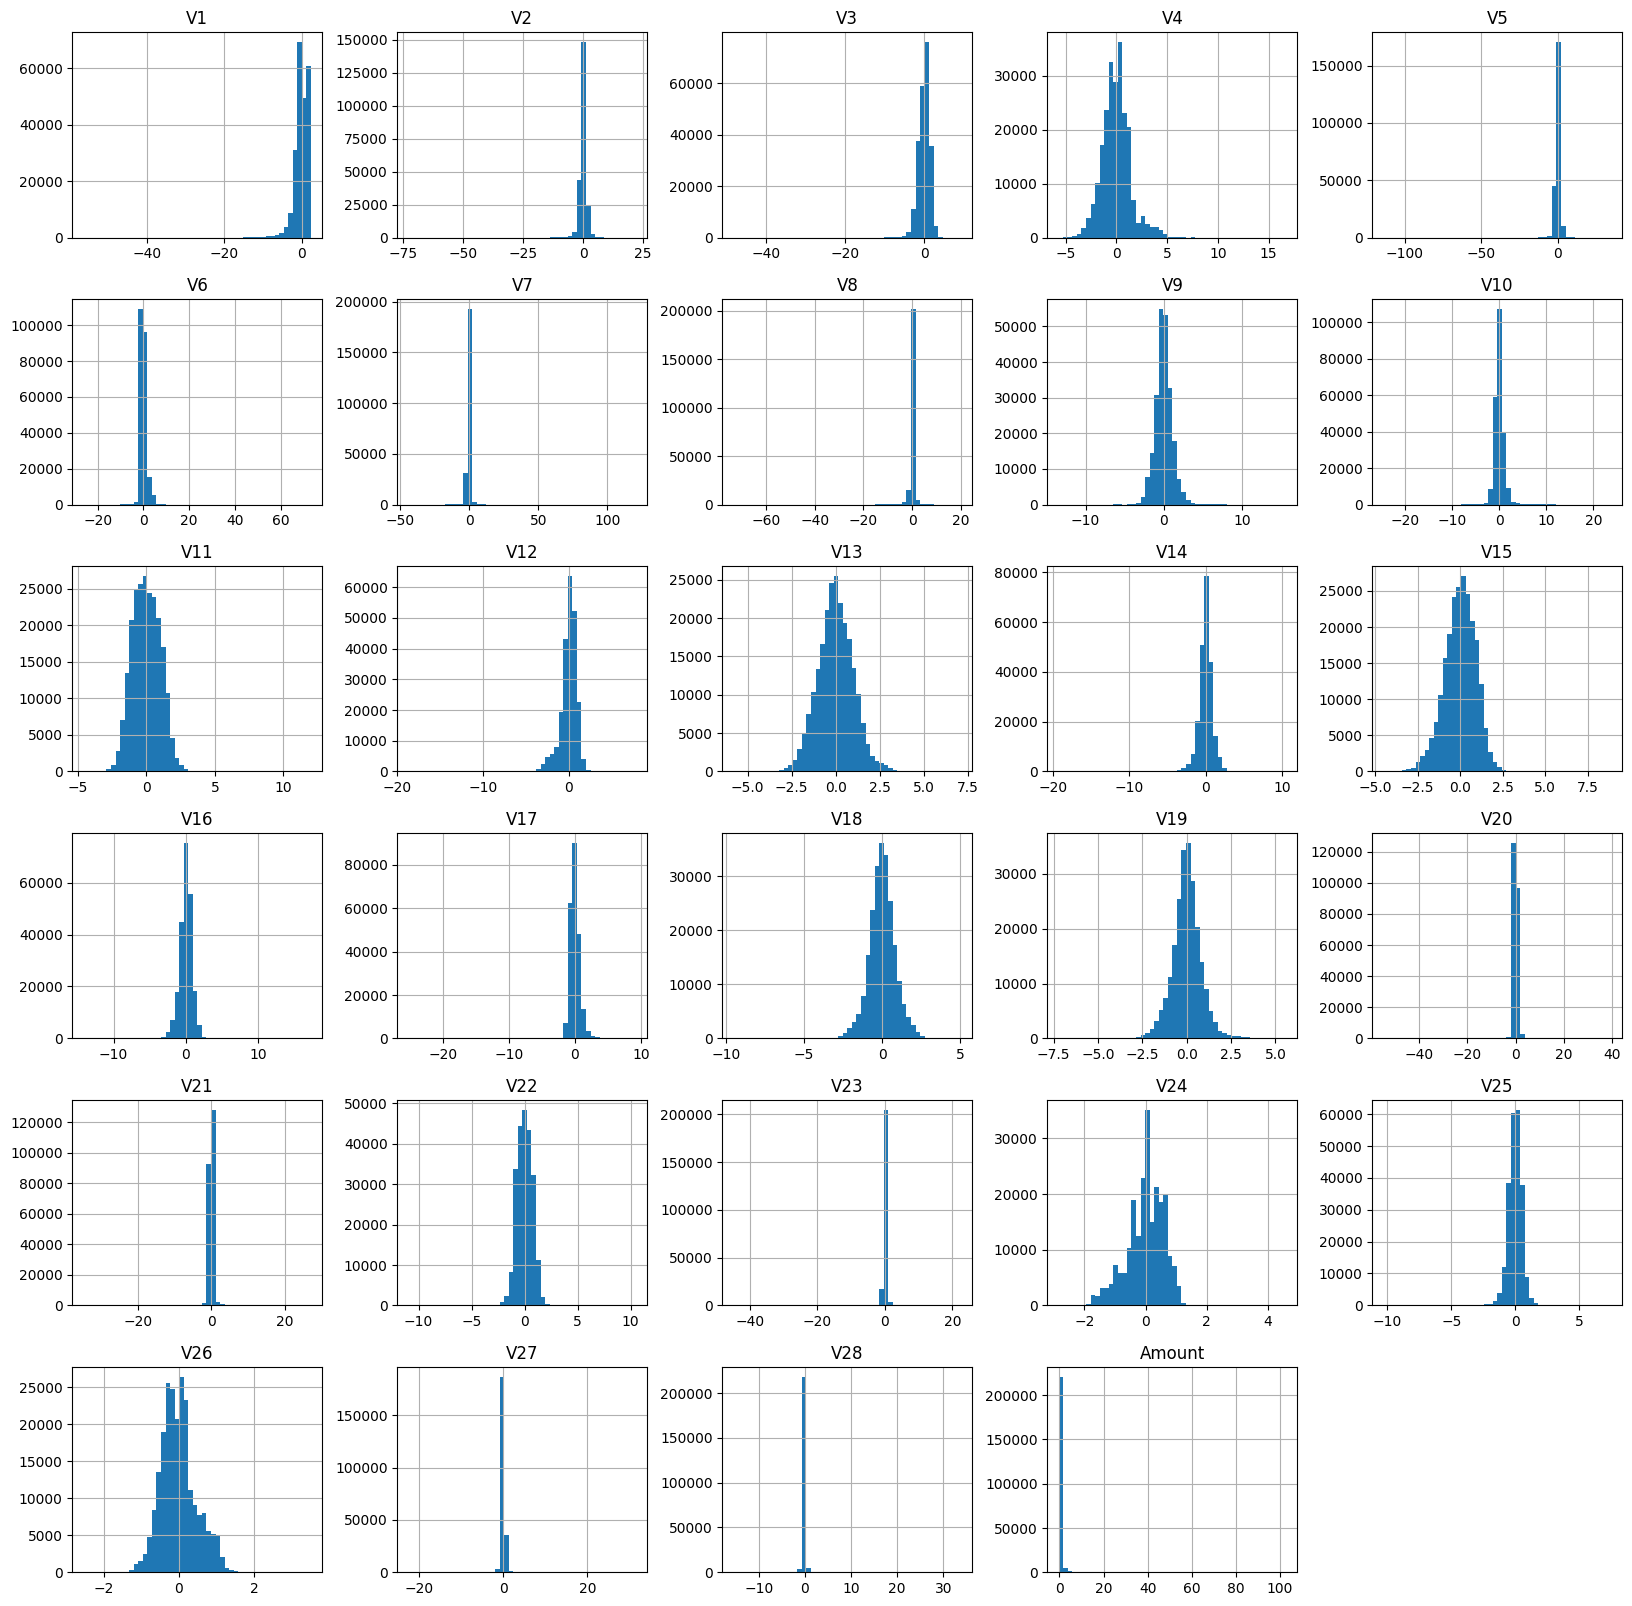

In [ ]:
# Plotting the distribution of each feature in the training set to check for skewness
X_train.hist(figsize=(20, 20), bins=50);

The distribution plots show that several variables exhibit significant skewness. We will apply a power transformation to mitigate this skewness and bring the variables closer to a normal distribution

### Making use of PowerTransformer for Skewness mitigation

In [ ]:
# Importing PowerTransformer for skewness mitigation
from sklearn.preprocessing import PowerTransformer

# Creating a PowerTransformer object with method='yeo-johnson'
pt = PowerTransformer(method='yeo-johnson')

# Fitting the PowerTransformer on the training data and transforming all columns
X_train_transformed = pt.fit_transform(X_train)

# Converting the transformed training data back to a DataFrame
X_train = pd.DataFrame(X_train_transformed, columns=X_train.columns)

# Displaying the first few rows of the transformed training data
display(X_train.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.815616,1.696579,-1.175359,0.640686,0.700124,0.049867,0.647395,0.705516,-1.076441,-0.459059,0.520625,0.877709,0.505199,-0.571843,-1.004526,-0.289590,1.491166,1.128494,1.174084,0.076745,0.174720,0.582792,-0.396565,0.117321,0.328464,-0.835820,0.480075,0.600026,0.084663
1,-0.770010,0.728662,2.125186,-0.100338,0.317321,-0.210971,1.012322,-0.802812,1.696790,0.028598,0.462510,-1.848313,2.247844,0.046248,-1.705063,-0.754791,0.260738,-0.524267,-0.601289,0.453147,-0.514347,-0.070511,-0.812135,0.642635,1.181690,0.561785,-1.071546,-1.560850,-0.825935
2,-0.809096,-0.208923,0.906346,-2.592702,-0.558388,-0.127357,-0.471249,0.439171,-2.353408,0.362995,-1.336464,-1.039197,1.085298,-0.518818,-0.016857,0.386144,-0.078463,0.224713,-0.986844,-0.153056,-0.441519,-1.170403,-0.101305,0.632513,0.772026,-0.930718,0.369288,0.105728,0.097172
3,0.541855,-0.547496,-0.415552,-0.382632,-0.530569,-0.634915,-0.148118,-0.169090,-1.043781,0.377780,1.321629,-0.865223,-1.113791,-0.572336,0.189804,2.304687,0.895353,-0.874596,1.241212,0.458559,-0.298451,-1.689489,0.025010,-0.328793,0.184807,-1.484139,-0.106168,0.171249,1.520337
4,1.679047,-0.848528,-1.233028,-1.132316,-0.478354,-0.772043,-0.374829,-0.482034,-1.555210,1.460382,-1.124955,-1.036687,0.312291,-0.207056,-0.673809,-1.242529,0.829441,-0.169637,-0.083780,-0.448498,0.186876,1.133052,-0.127573,1.412269,0.765088,0.485937,-0.119273,-0.171617,0.506234


### Mitigating Skewness with PowerTransformer
We apply the Yeo-Johnson power transformation to the skewed features in both the training and testing sets.

In [ ]:
# Transforming the test data using the PowerTransformer fitted on the training data
X_test_transformed = pt.transform(X_test)

# Converting the transformed test data back to a DataFrame
X_test = pd.DataFrame(X_test_transformed, columns=X_test.columns)

# Displaying the first few rows of the transformed test data
display(X_test.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.232273,1.030620,-0.453466,0.923555,0.801601,-0.663934,0.843707,-0.189948,-0.597128,-0.863759,0.405328,-0.179867,0.522742,-1.989768,0.857445,0.111537,2.200182,0.534935,0.055534,0.309364,-0.454985,-1.147507,0.096945,1.524615,0.110891,-1.820225,0.644012,0.193251,-0.462122
1,-0.170350,-0.014027,0.435430,-0.688790,0.837735,1.503231,0.030512,0.412404,0.608427,-0.536388,0.724268,1.339083,0.672951,-0.540828,0.105565,-0.574803,-0.580786,-0.463370,-1.194031,-0.144871,0.421357,1.815890,-0.236638,-1.424790,-0.874717,-0.432159,-0.103720,-0.704825,-0.733122
2,-0.934431,-0.376757,1.422487,0.521792,-0.421249,0.723706,-0.640918,0.736661,-1.299133,0.122137,-1.662498,-0.400322,0.964790,-0.259434,1.257067,-1.738958,0.433177,2.129500,-0.160095,0.037213,-0.029304,0.005784,-0.110878,-1.239178,0.537379,0.117639,0.062224,-0.240115,1.175235
3,0.647675,-0.282851,0.769980,0.288331,-0.760856,-0.076077,-0.650752,-0.066073,2.098103,-0.687090,-0.065220,-2.035772,1.217815,1.223729,-0.435046,0.240391,0.661261,0.062688,0.208668,-0.137691,-0.386059,-0.631910,0.023807,-0.053348,0.180715,1.823478,-0.179775,0.035784,-0.330205
4,0.490554,-0.122892,-0.032885,0.789254,-0.080164,0.192195,-0.028993,0.073902,-0.035358,0.217689,1.003638,0.119020,-1.099880,0.823881,0.682320,0.173196,-0.623436,0.259304,-0.528908,-0.106576,0.233435,0.387502,-0.302193,-0.602289,1.071639,-0.472351,0.012639,0.059186,0.750303


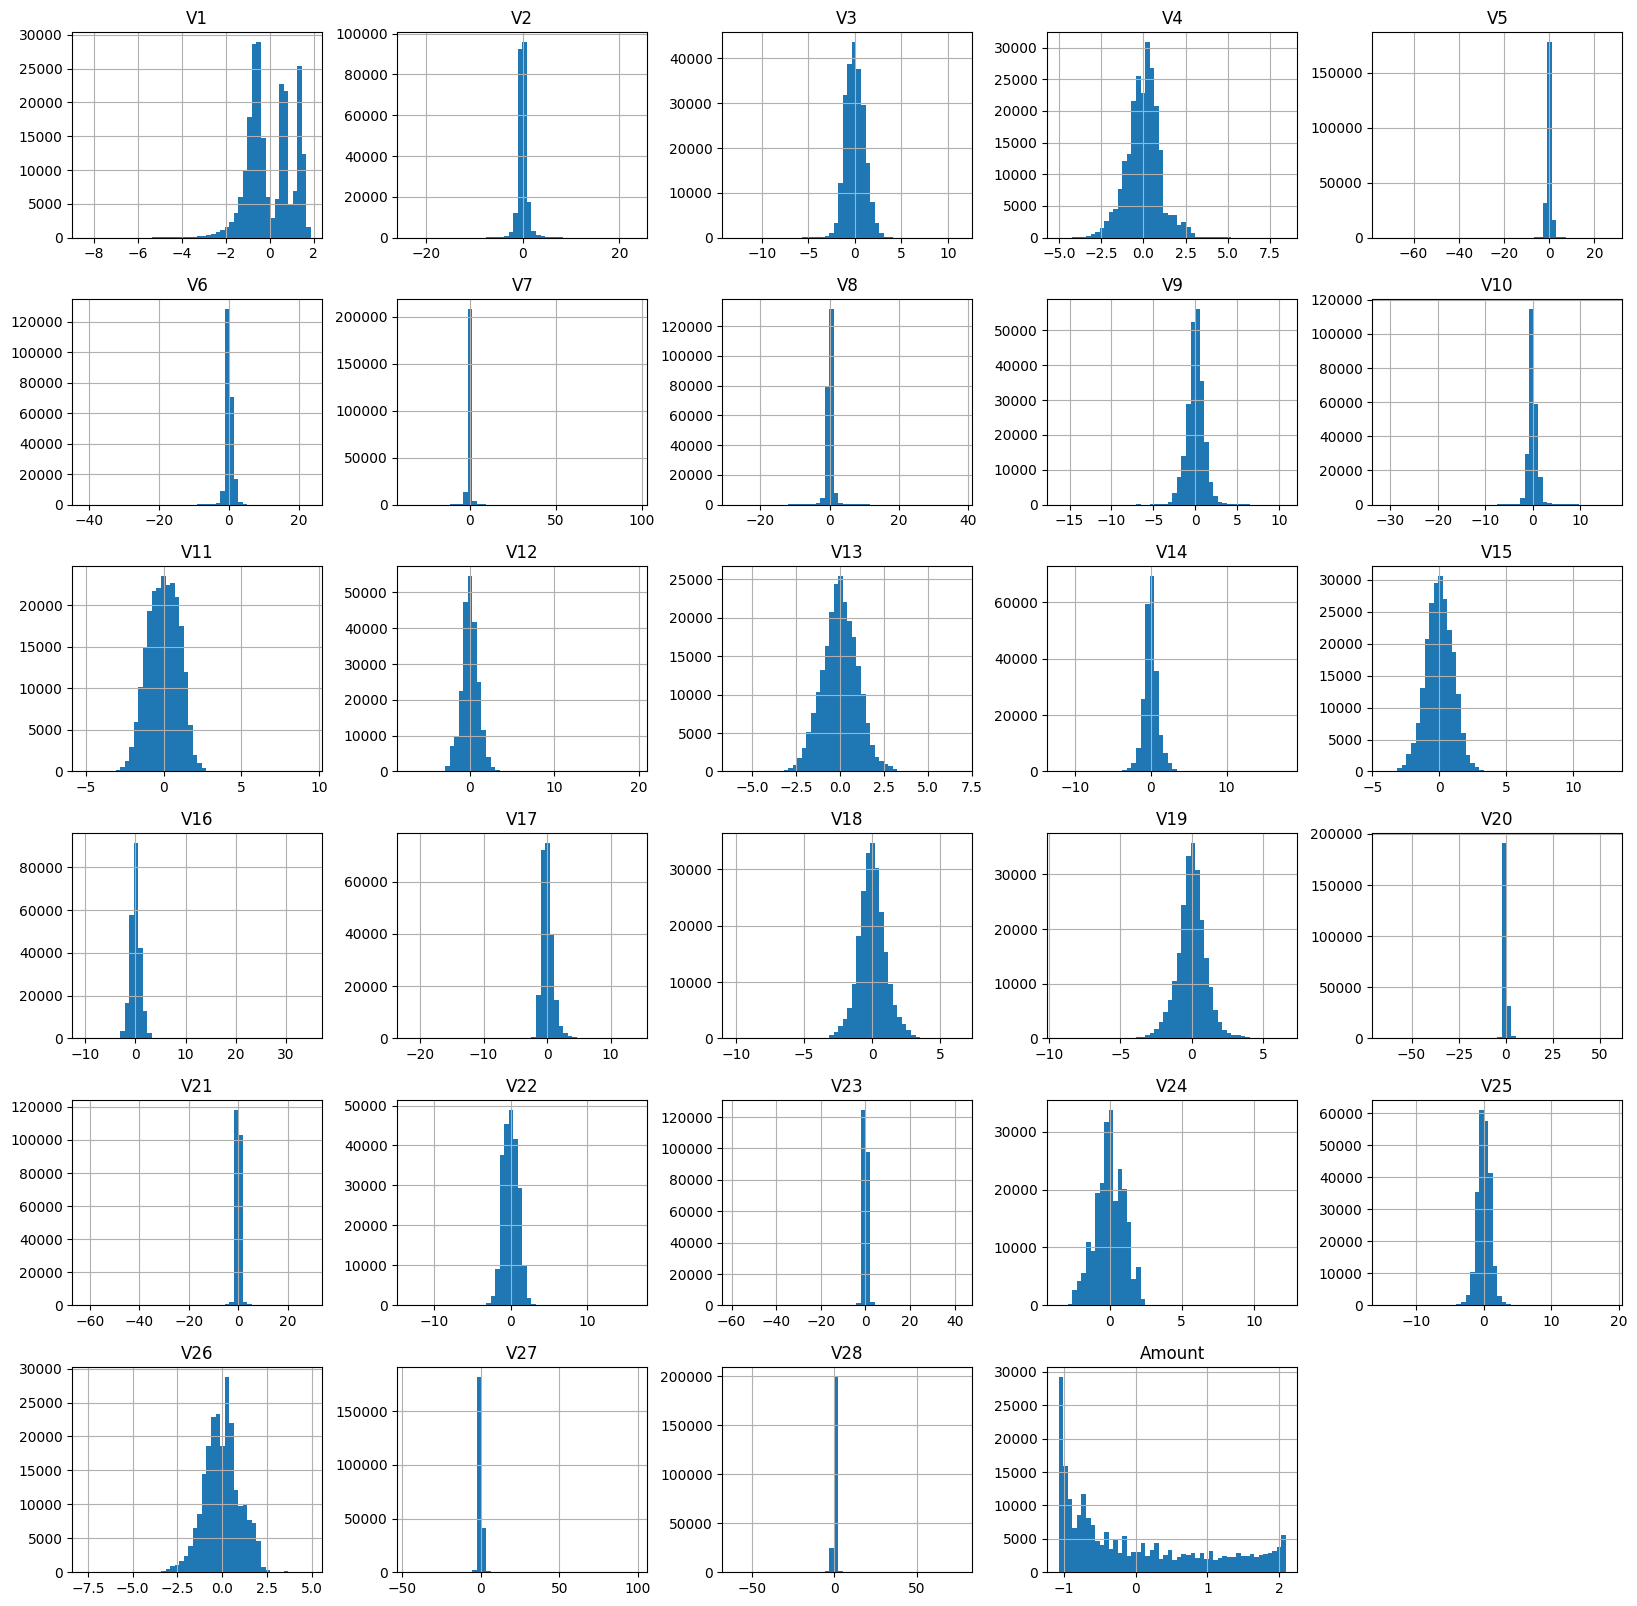

In [ ]:
# Plotting the distribution of each feature in the training set after Power Transformation
X_train.hist(figsize=(20, 20), bins=50);

After applying the PowerTransformer, the distribution plots show that the variables are now more normally distributed, which is beneficial for many machine learning algorithms

# Model Building on Imbalanced Data

Given the significant class imbalance in the dataset, we will first build models on the imbalanced data and evaluate their performance using appropriate metrics.

### Metric Selection for Heavily Imbalanced Data

In the context of heavily imbalanced datasets like this one, accuracy is not a suitable evaluation metric. A model that simply predicts the majority class for all instances would achieve very high accuracy but would fail to identify any instances of the minority class (fraud). Therefore, we will focus on metrics that are more informative for imbalanced classification, such as:

- **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):** This metric assesses the model's ability to distinguish between the positive and negative classes across various probability thresholds. A higher ROC-AUC indicates better performance.
- **Precision:** The proportion of correctly predicted positive instances among all instances predicted as positive. In our case, it's the proportion of correctly identified fraudulent transactions among all transactions flagged as fraudulent.
- **Recall (Sensitivity):** The proportion of correctly predicted positive instances among all actual positive instances. In our case, it's the proportion of correctly identified fraudulent transactions among all actual fraudulent transactions.
- **F1-Score:** The harmonic mean of precision and recall, providing a balanced measure of the model's performance.

We will use the ROC-AUC score for hyperparameter tuning and then evaluate the models using precision, recall, and F1-score at an optimal threshold determined from the ROC curve.

#### Model Selection Considerations for Large Datasets

When dealing with large datasets like this, computational efficiency becomes a significant factor in model selection.

- **Support Vector Machines (SVM):** SVMs are generally not computationally efficient for large datasets due to the complexity of finding the optimal hyperplane. Training and cross-validation can be very time-consuming and resource-intensive.
- **K-Nearest Neighbors (KNN):** KNN is a memory-based algorithm that stores the entire training dataset. For large datasets, this can lead to high memory usage and slow prediction times as it needs to calculate distances to all training instances for each prediction.
- **Random Forest:** While generally more scalable than SVM and KNN, Random Forest can still be computationally expensive for very large datasets and extensive hyperparameter tuning, especially with a large number of trees.

These computational limitations were considered when selecting models and hyperparameter tuning approaches in this project.

#### Why KNN was not used for model building?

KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points. It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

### Logistic Regression

We start by building a Logistic Regression model, a simple yet effective algorithm for binary classification.

In [ ]:
# Importing necessary metrics for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Defining a function to draw the ROC curve
def draw_roc( actual, probs ):
    # Calculate ROC curve
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    # Calculate AUC
    auc_score = metrics.roc_auc_score( actual, probs )
    # Plot ROC curve
    plt.figure(figsize=(4, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

#### Tuning Hyperparameter C

We tune the hyperparameter `C`, which is the inverse of the regularization strength. Smaller values of `C` increase regularization, while larger values decrease it. We use GridSearchCV with cross-validation to find the optimal `C` that maximizes the ROC-AUC score.

In [ ]:
# Creating a KFold object with 5 splits for cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Defining the parameter grid for hyperparameter tuning of Logistic Regression
# We are tuning the 'C' parameter (inverse of regularization strength)
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Setting up GridSearchCV to find the best 'C' using ROC-AUC as the scoring metric
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV model on the training data to find the best hyperparameters
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

#### Cross-validation Results

We examine the results of the cross-validation to understand how the model performed with different values of C.

In [ ]:
# Displaying the results of the grid search cross-validation in a DataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)
display(cv_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.708271,0.181683,0.040995,0.017650,0.01,{'C': 0.01},0.953241,0.975522,0.994070,0.978374,0.995613,0.979364,0.015352,1,0.986653,0.984314,0.979953,0.983823,0.978845,0.982718,0.002895
1,0.721019,0.072051,0.033416,0.008726,0.10,{'C': 0.1},0.954691,0.973719,0.994790,0.977827,0.994515,0.979109,0.014901,2,0.986305,0.983728,0.979396,0.983291,0.977939,0.982132,0.003045
2,0.788397,0.073359,0.036108,0.008829,1.00,{'C': 1},0.954680,0.973314,0.994584,0.977403,0.994330,0.978862,0.014860,3,0.986024,0.983594,0.979211,0.982725,0.977736,0.981858,0.003004
3,0.834363,0.211441,0.044602,0.004540,10.00,{'C': 10},0.954687,0.973275,0.994594,0.977386,0.994312,0.978851,0.014860,4,0.985989,0.983578,0.979179,0.982699,0.977714,0.981832,0.003003
4,0.709264,0.045325,0.030726,0.011240,100.00,{'C': 100},0.954688,0.973269,0.994597,0.977384,0.994310,0.978850,0.014860,5,0.985986,0.983576,0.979176,0.982696,0.977711,0.981829,0.003003
5,0.845549,0.139545,0.043150,0.021207,1000.00,{'C': 1000},0.954687,0.973269,0.994597,0.977384,0.994310,0.978849,0.014860,6,0.985985,0.983576,0.979175,0.982696,0.977711,0.981829,0.003003


#### Plotting AUC vs. C

We visualize the relationship between the hyperparameter C and the mean test and train ROC-AUC scores.

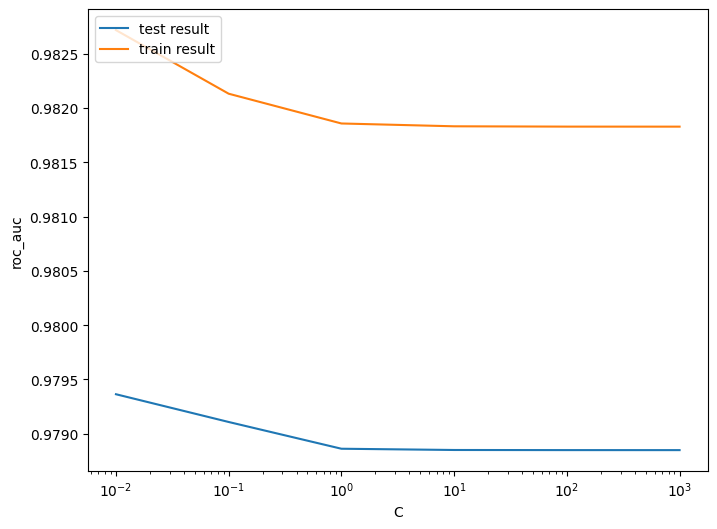

In [ ]:
# Plotting the mean test and train ROC-AUC scores for different values of 'C'
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log') # Using a log scale for the x-axis ('C') as the values vary widely
plt.show()

#### Best Hyperparameter and Score

We identify the best value of C and the corresponding ROC-AUC score from the grid search.

In [ ]:
# Printing the best ROC-AUC score and the corresponding value of 'C' from the grid search
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9793642026790546 at C = 0.01


#### Logistic Regression with Optimal C

We train a Logistic Regression model using the optimal `C` value determined from the hyperparameter tuning.

In [ ]:
# Instantiating the Logistic Regression model with the best 'C' found from GridSearchCV
logistic_imb = LogisticRegression(C=0.01)

##### Training the Model

We fit the Logistic Regression model on the training data.

In [ ]:
# Fitting the Logistic Regression model on the training data
logistic_imb_model = logistic_imb.fit(X_train, y_train)

##### Prediction on the Training Set

We make predictions on the training set using the trained Logistic Regression model.

In [ ]:
# Making predictions on the training set
y_train_pred = logistic_imb_model.predict(X_train)

##### Confusion Matrix (Training Set)

We calculate and display the confusion matrix for the training set to evaluate the model's performance.

In [ ]:
# Calculating the confusion matrix for the training set
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227424     27]
 [   142    252]]


##### Classification Metrics (Training Set)

We calculate and display various classification metrics (Accuracy, Sensitivity, Specificity, F1-Score) for the training set.

In [ ]:
# Extracting True Positives, True Negatives, False Positives, and False Negatives from the confusion matrix
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Calculating and printing various evaluation metrics for the training set
# Accuracy: Overall proportion of correct predictions
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity (Recall): Proportion of actual positive instances correctly identified
print("Sensitivity:-",TP / float(TP+FN))

# Specificity: Proportion of actual negative instances correctly identified
print("Specificity:-", TN / float(TN+FP))

# F1-Score: Harmonic mean of precision and recall
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992582676819768
Sensitivity:- 0.6395939086294417
Specificity:- 0.9998812931136817
F1-Score:- 0.7488855869242199


##### Classification Report (Training Set)

We display the classification report for the training set, which provides precision, recall, f1-score, and support for each class.

In [ ]:
# Printing the classification report for the training set, which includes precision, recall, f1-score, and support for each class
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.64      0.75       394

    accuracy                           1.00    227845
   macro avg       0.95      0.82      0.87    227845
weighted avg       1.00      1.00      1.00    227845



##### Predicted Probabilities (Training Set)

We obtain the predicted probabilities for the positive class on the training set, which are needed for plotting the ROC curve.

In [ ]:
# Getting the predicted probabilities for the positive class (class 1) on the training set
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

##### ROC-AUC Score (Training Set)

We calculate and display the ROC-AUC score for the training set.

In [ ]:
# Calculating the ROC-AUC score for the training set
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
print("ROC-AUC:", auc)

ROC-AUC: 0.9828150078266424


##### ROC Curve (Training Set)

We plot the ROC curve for the training set to visualize the model's discriminatory power.

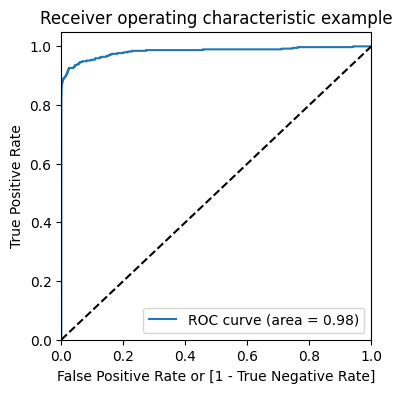

In [ ]:
# Plotting the ROC curve for the training set
draw_roc(y_train, y_train_pred_proba)

The ROC-AUC score of 0.98 on the training set indicates that the model has excellent discriminatory power on the training data.

#### Model Evaluation on the Test Set

We evaluate the performance of the trained Logistic Regression model on the unseen test set to assess its generalization ability.

##### Prediction on the Test Set

We make predictions on the test set using the trained Logistic Regression model.

In [ ]:
# Making predictions on the test set
y_test_pred = logistic_imb_model.predict(X_test)

##### Confusion Matrix (Test Set)

We calculate and display the confusion matrix for the test set.

In [ ]:
# Calculating the confusion matrix for the test set
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56855     9]
 [   44    54]]


##### Classification Metrics (Test Set)

We calculate and display various classification metrics for the test set.

In [ ]:
# Extracting True Positives, True Negatives, False Positives, and False Negatives from the confusion matrix
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Calculating and printing various evaluation metrics for the test set
# Accuracy: Overall proportion of correct predictions
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity (Recall): Proportion of actual positive instances correctly identified
print("Sensitivity:-",TP / float(TP+FN))

# Specificity: Proportion of actual negative instances correctly identified
print("Specificity:-", TN / float(TN+FP))

# F1-Score: Harmonic mean of precision and recall (using y_test and y_test_pred)
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9990695551420246
Sensitivity:- 0.5510204081632653
Specificity:- 0.9998417276308385
F1-Score:- 0.6708074534161491


##### Classification Report (Test Set)

We display the classification report for the test set.

In [ ]:
# Printing the classification report for the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.55      0.67        98

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



##### Predicted Probabilities (Test Set)

We obtain the predicted probabilities for the positive class on the test set.

In [ ]:
# Getting the predicted probabilities for the positive class (class 1) on the test set
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

##### ROC-AUC Score (Test Set)

We calculate and display the ROC-AUC score for the test set.

In [ ]:
# Calculating the ROC-AUC score for the test set
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC-AUC:", auc)

ROC-AUC: 0.9784015639176323


##### ROC Curve (Test Set)

We plot the ROC curve for the test set.

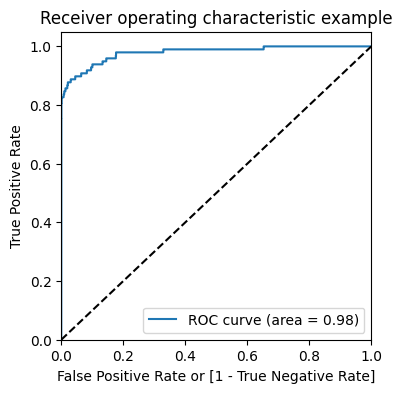

In [ ]:
# Plotting the ROC curve for the test set
draw_roc(y_test, y_test_pred_proba)

The ROC-AUC score of 0.98 on the test set indicates good performance and generalization ability on unseen data.

### XGBoost

Next, we build an XGBoost model, a powerful gradient boosting algorithm known for its performance.

In [ ]:
# Importing XGBoost Classifier
from xgboost import XGBClassifier

##### Tuning Hyperparameters

We tune the hyperparameters of the XGBoost model using GridSearchCV with cross-validation to find the optimal combination that maximizes the ROC-AUC score. The hyperparameters being tuned are `learning_rate` and `subsample`.

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object with 3 splits for cross-validation
folds = 3

# specify range of hyperparameters to tune
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}

# specify the XGBoost model with initial parameters
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV() to find the best hyperparameters using ROC-AUC as the scoring metric
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the GridSearchCV model on the training data
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

#### Cross-validation Results

We examine the results of the cross-validation for XGBoost.

In [ ]:
# Displaying the results of the grid search cross-validation in a DataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)
display(cv_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.887335,0.767518,0.120893,0.004796,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.984542,0.983541,0.963021,0.977035,0.009918,1,0.999166,0.999673,0.999555,0.999465,0.000217
1,3.927985,0.883589,0.118219,0.002625,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.982429,0.969673,0.970495,0.974199,0.005829,2,0.999914,0.998849,0.997775,0.998846,0.000873
2,4.707815,1.354093,0.124000,0.041659,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.952188,0.498120,0.501664,0.650658,0.213219,3,0.984078,0.501961,0.499690,0.661910,0.227809
3,5.283987,0.785951,0.067237,0.002736,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.500000,0.500000,0.500000,0.500000,0.000000,5,0.500000,0.500000,0.500000,0.500000,0.000000
4,5.900343,0.783140,0.071321,0.002847,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.500000,0.500000,0.480169,0.493390,0.009348,6,0.500000,0.500000,0.487475,0.495825,0.005904
5,5.193287,0.539606,0.094101,0.025763,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.509495,0.498971,0.500000,0.502822,0.004737,4,0.521088,0.502836,0.500000,0.507975,0.009345


#### Plotting AUC vs. Hyperparameters

We visualize the relationship between the hyperparameters (`learning_rate` and `subsample`) and the mean test and train ROC-AUC scores for XGBoost.

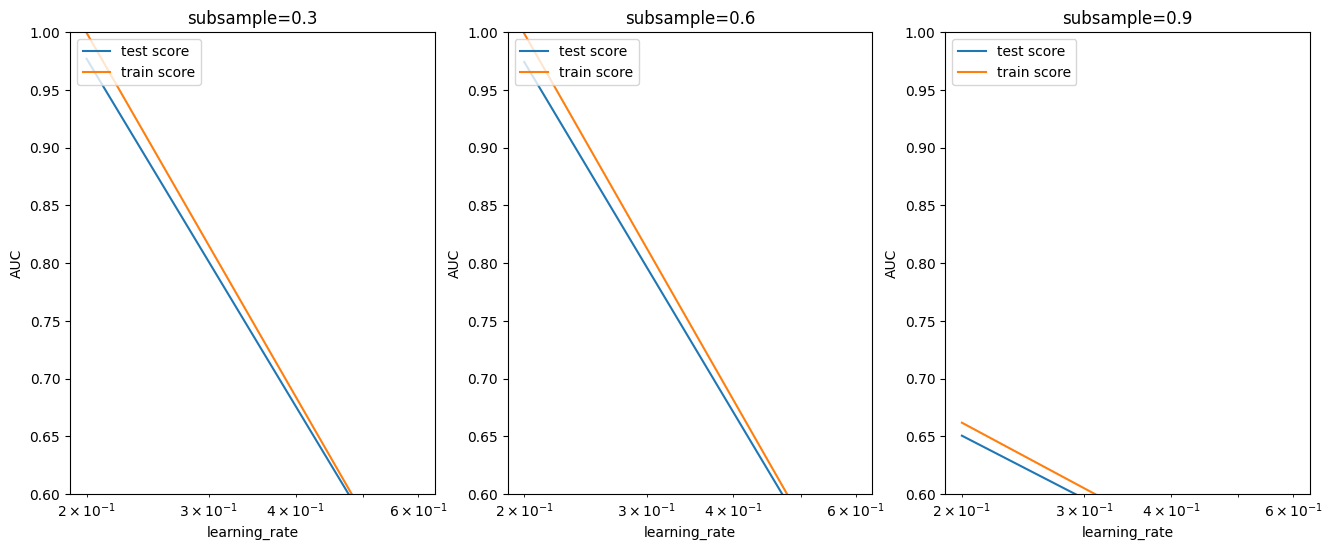

In [ ]:
# plot of learning_rate versus train and validation scores for different subsamples

# Plotting the mean test and train ROC-AUC scores for different values of learning_rate and subsample
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}

# Iterating through different subsample values to create subplots
for n, subsample in enumerate(param_grid['subsample']):
    # Creating subplots
    plt.subplot(1,len(param_grid['subsample']), n+1)
    # Filtering the results for the current subsample value
    df = cv_results[cv_results['param_subsample']==subsample]

    # Plotting the mean test and train scores against learning_rate
    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log') # Using a log scale for the x-axis (learning_rate)
plt.show() # Added plt.show()

#### Best Hyperparameters

We identify the best hyperparameters for XGBoost from the grid search.

In [ ]:
# Printing the best hyperparameters found by GridSearchCV
display(model_cv.best_params_)

{'learning_rate': 0.2, 'subsample': 0.3}

##### XGBoost Model with Optimal Hyperparameters

We train an XGBoost model using the optimal hyperparameters determined from the tuning process.

In [ ]:
# Defining the chosen hyperparameters for the XGBoost model based on GridSearchCV results
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'} # 'objective':'binary:logistic' outputs probability

# Instantiating the XGBoost Classifier with the chosen hyperparameters
xgb_imb_model = XGBClassifier(**params) # Using **params to pass the dictionary as keyword arguments

# Fitting the XGBoost model on the training data
xgb_imb_model.fit(X_train, y_train)

# Displaying the trained model
display(xgb_imb_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

##### Prediction on the Training Set

We make predictions on the training set using the trained XGBoost model.

In [ ]:
# Making predictions on the training set
y_train_pred = xgb_imb_model.predict(X_train)

##### Confusion Matrix (Training Set)

We calculate and display the confusion matrix for the training set.

In [ ]:
# Calculating the confusion matrix for the training set
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227443      8]
 [    51    343]]


##### Classification Metrics (Training Set)

We calculate and display various classification metrics for the training set.

In [ ]:
# Extracting True Positives, True Negatives, False Positives, and False Negatives from the confusion matrix
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Calculating and printing various evaluation metrics for the training set
# Accuracy: Overall proportion of correct predictions
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity (Recall): Proportion of actual positive instances correctly identified
print("Sensitivity:-",TP / float(TP+FN))

# Specificity: Proportion of actual negative instances correctly identified
print("Specificity:-", TN / float(TN+FP))

# F1-Score: Harmonic mean of precision and recall
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.999741052030986
Sensitivity:- 0.8705583756345178
Specificity:- 0.999964827589239
F1-Score:- 0.9208053691275168


##### Classification Report (Training Set)

We display the classification report for the training set.

In [ ]:
# Printing the classification report for the training set
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.98      0.87      0.92       394

    accuracy                           1.00    227845
   macro avg       0.99      0.94      0.96    227845
weighted avg       1.00      1.00      1.00    227845



##### Predicted Probabilities (Training Set)

We obtain the predicted probabilities for the positive class on the training set.

In [ ]:
# Getting the predicted probabilities for the positive class (class 1) on the training set
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

##### ROC-AUC Score (Training Set)

We calculate and display the ROC-AUC score for the training set.

In [ ]:
# Calculating the ROC-AUC score for the training set
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
print("ROC-AUC:", auc)

ROC-AUC: 0.9984054020716506


##### ROC Curve (Training Set)

We plot the ROC curve for the training set.

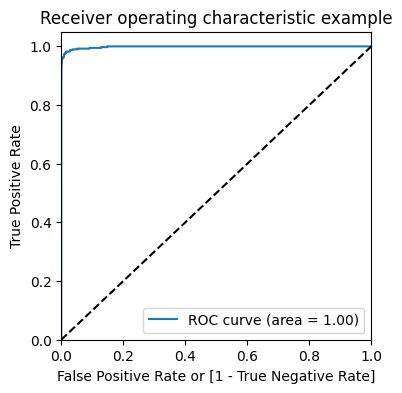

In [ ]:
# Plotting the ROC curve for the training set
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Model Evaluation on the Test Set

We evaluate the performance of the trained XGBoost model on the unseen test set.

##### Prediction on the Test Set

We make predictions on the test set using the trained XGBoost model.

In [ ]:
# Making predictions on the test set using the trained XGBoost model
y_test_pred = xgb_imb_model.predict(X_test)

##### Confusion Matrix (Test Set)

We calculate and display the confusion matrix for the test set.

In [ ]:
# Calculating the confusion matrix for the test set
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56859     5]
 [   23    75]]


##### Classification Metrics (Test Set)

We calculate and display various classification metrics for the test set.

In [ ]:
# Extracting True Positives, True Negatives, False Positives, and False Negatives from the confusion matrix
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Calculating and printing various evaluation metrics for the test set
# Accuracy: Overall proportion of correct predictions
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity (Recall): Proportion of actual positive instances correctly identified
print("Sensitivity:-",TP / float(TP+FN))

# Specificity: Proportion of actual negative instances correctly identified
print("Specificity:-", TN / float(TN+FP))

# F1-Score: Harmonic mean of precision and recall (using y_test and y_test_pred)
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9995084442259752
Sensitivity:- 0.7653061224489796
Specificity:- 0.9999120709060214
F1-Score:- 0.8426966292134831


##### Classification Report (Test Set)

We display the classification report for the test set.

In [ ]:
# Printing the classification report for the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.77      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



##### Predicted Probabilities (Test Set)

We obtain the predicted probabilities for the positive class on the test set.

In [ ]:
# Getting the predicted probabilities for the positive class (class 1) on the test set
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

##### ROC-AUC Score (Test Set)

We calculate and display the ROC-AUC score for the test set.

In [ ]:
# Calculating the ROC-AUC score for the test set
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC-AUC:", auc)

ROC-AUC: 0.9771445367679993


##### ROC Curve (Test Set)

We plot the ROC curve for the test set.

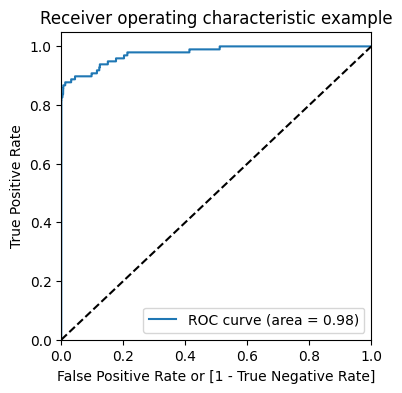

In [ ]:
# Plotting the ROC curve for the test set
draw_roc(y_test, y_test_pred_proba)

### Decision Tree

We build a Decision Tree classifier, a non-parametric supervised learning algorithm.

In [ ]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

##### Tuning Hyperparameters

We tune the hyperparameters of the Decision Tree model using GridSearchCV with cross-validation to find the optimal combination that maximizes the ROC-AUC score. The hyperparameters being tuned are `max_depth`, `min_samples_leaf`, and `min_samples_split`.

In [ ]:
# hyperparameter tuning with Decision Tree

# Creating the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': range(5, 15, 5), # Tuning max_depth from 5 to 15 with step 5
    'min_samples_leaf': range(50, 150, 50), # Tuning min_samples_leaf from 50 to 150 with step 50
    'min_samples_split': range(50, 150, 50), # Tuning min_samples_split from 50 to 150 with step 50
}

# Instantiate the Decision Tree Classifier model
dtree = DecisionTreeClassifier()

# Instantiate the grid search model to find the best hyperparameters using ROC-AUC as the scoring metric and 3-fold cross-validation
grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the training data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

#### Cross-validation Results

We examine the results of the cross-validation for the Decision Tree model.

In [ ]:
# Displaying the results of the grid search cross-validation in a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)
display(cv_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.912457,0.137018,0.021354,0.004136,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.926258,0.945795,0.938571,0.936875,0.008066,6
1,6.072586,0.292211,0.015575,0.000654,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.941398,0.945784,0.938571,0.941918,0.002968,5
2,5.861274,0.296453,0.015578,0.000577,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.941259,0.949889,0.938812,0.943320,0.004751,3
3,6.036865,0.350297,0.015238,0.000335,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.941259,0.949889,0.938812,0.943320,0.004751,3
4,11.580392,0.157295,0.023674,0.004171,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.970417,0.952850,0.928598,0.950622,0.017145,1
5,11.723572,0.050356,0.019139,0.001366,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.970427,0.945239,0.928561,0.948076,0.017209,2
6,11.745463,0.105608,0.017977,0.000476,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.932026,0.920413,0.943402,0.931947,0.009385,7
7,11.696470,0.027521,0.020574,0.002317,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.932008,0.920414,0.935962,0.929461,0.006598,8


#### Best Hyperparameters and Score

We identify the best hyperparameters and the corresponding ROC-AUC score for the Decision Tree model.

In [ ]:
# Printing the best ROC-AUC score and the corresponding best hyperparameters found by GridSearchCV
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9506217236685549
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


##### Decision Tree Model with Optimal Hyperparameters

We train a Decision Tree model using the optimal hyperparameters determined from tuning.

In [ ]:
# Model with optimal hyperparameters

# Instantiating the Decision Tree Classifier with the best hyperparameters found
dt_imb_model = DecisionTreeClassifier(criterion = "gini", # Using Gini impurity as the splitting criterion
                                  random_state = 100, # Setting random state for reproducibility
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

# Fitting the Decision Tree model on the training data
dt_imb_model.fit(X_train, y_train)

# Displaying the trained model
display(dt_imb_model)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

##### Prediction on the Training Set

We make predictions on the training set using the trained Decision Tree model.

In [ ]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

##### Confusion Matrix (Training Set)

We calculate and display the confusion matrix for the training set.

In [ ]:
# Confusion matrix for the training set
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227362     89]
 [    82    312]]


##### Classification Metrics (Training Set)

We calculate and display various classification metrics for the training set.

In [ ]:
# Extracting True Positives, True Negatives, False Positives, and False Negatives from the confusion matrix
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Calculating and printing various evaluation metrics for the training set
# Accuracy: Overall proportion of correct predictions
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity (Recall): Proportion of actual positive instances correctly identified
print("Sensitivity:-",TP / float(TP+FN))

# Specificity: Proportion of actual negative instances correctly identified
print("Specificity:-", TN / float(TN+FP))

# F1-Score: Harmonic mean of precision and recall (using y_train and y_train_pred)
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992494897847221
Sensitivity:- 0.7918781725888325
Specificity:- 0.9996087069302839
F1-Score:- 0.7849056603773585


##### Classification Report (Training Set)

We display the classification report for the training set.

In [ ]:
# Printing the classification report for the training set
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.78      0.79      0.78       394

    accuracy                           1.00    227845
   macro avg       0.89      0.90      0.89    227845
weighted avg       1.00      1.00      1.00    227845



##### Predicted Probabilities (Training Set)

We obtain the predicted probabilities for the positive class on the training set.

In [ ]:
# Predicted probability for the positive class on the training set
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

##### ROC-AUC Score (Training Set)

We calculate and display the ROC-AUC score for the training set.

In [ ]:
# roc_auc score for the training set
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
print("ROC-AUC:", auc)

ROC-AUC: 0.9817267720986461


##### ROC Curve (Training Set)

We plot the ROC curve for the training set.

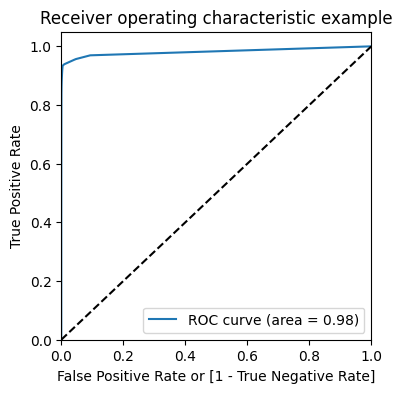

In [ ]:
# Plot the ROC curve for the training set
draw_roc(y_train, y_train_pred_proba)

#### Model Evaluation on the Test Set

We evaluate the performance of the trained Decision Tree model on the unseen test set.

##### Prediction on the Test Set

We make predictions on the test set using the trained Decision Tree model.

In [ ]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

##### Confusion Matrix (Test Set)

We calculate and display the confusion matrix for the test set.

In [ ]:
# Confusion matrix for the test set
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56831    33]
 [   29    69]]


##### Classification Metrics (Test Set)

We calculate and display various classification metrics for the test set.

In [ ]:
# Extracting True Positives, True Negatives, False Positives, and False Negatives from the confusion matrix
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Calculating and printing various evaluation metrics for the test set
# Accuracy: Overall proportion of correct predictions
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity (Recall): Proportion of actual positive instances correctly identified
print("Sensitivity:-",TP / float(TP+FN))

# Specificity: Proportion of actual negative instances correctly identified
print("Specificity:-", TN / float(TN+FP))

# F1-Score: Harmonic mean of precision and recall (using y_test and y_test_pred)
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9989115550718023
Sensitivity:- 0.7040816326530612
Specificity:- 0.9994196679797411
F1-Score:- 0.69


##### Classification Report (Test Set)

We display the classification report for the test set.

In [ ]:
# Printing the classification report for the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.70      0.69        98

    accuracy                           1.00     56962
   macro avg       0.84      0.85      0.84     56962
weighted avg       1.00      1.00      1.00     56962



##### Predicted Probabilities (Test Set)

We obtain the predicted probabilities for the positive class on the test set.

In [ ]:
# Predicted probability for the positive class on the test set
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

##### ROC-AUC Score (Test Set)

We calculate and display the ROC-AUC score for the test set.

In [ ]:
# roc_auc score for the test set
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC-AUC:", auc)

ROC-AUC: 0.9210866887554122


##### ROC Curve (Test Set)

We plot the ROC curve for the test set.

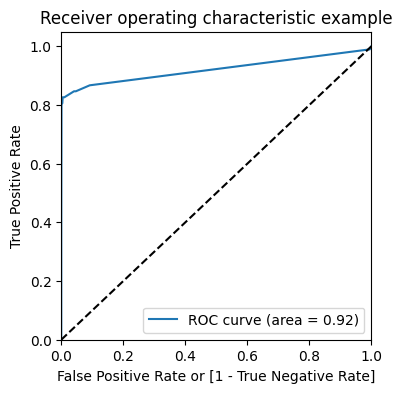

In [ ]:
# Plot the ROC curve for the test set
draw_roc(y_test, y_test_pred_proba)

### Model Comparison on Imbalanced Data

Comparing the models trained on the imbalanced data, both Logistic Regression and XGBoost performed well in terms of ROC-AUC score. While XGBoost achieved a slightly higher ROC-AUC on the test set compared to Logistic Regression, it's important to consider the computational cost. XGBoost is generally more computationally expensive than Logistic Regression. The decision to choose between them would depend on the available resources and the trade-off between a marginal improvement in performance and increased computational cost.

In [ ]:
# Automatically create a DataFrame to store the performance metrics
performance_metrics_imb = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression', 'XGBoost', 'XGBoost', 'Decision Tree', 'Decision Tree'],
    'Dataset': ['Train', 'Test', 'Train', 'Test', 'Train', 'Test'],
    'Accuracy': [metrics.accuracy_score(y_train, logistic_imb_model.predict(X_train)), metrics.accuracy_score(y_test, logistic_imb_model.predict(X_test)),
                 metrics.accuracy_score(y_train, xgb_imb_model.predict(X_train)), metrics.accuracy_score(y_test, xgb_imb_model.predict(X_test)),
                 metrics.accuracy_score(y_train, dt_imb_model.predict(X_train)), metrics.accuracy_score(y_test, dt_imb_model.predict(X_test))],
    'Sensitivity': [metrics.recall_score(y_train, logistic_imb_model.predict(X_train)), metrics.recall_score(y_test, logistic_imb_model.predict(X_test)),
                    metrics.recall_score(y_train, xgb_imb_model.predict(X_train)), metrics.recall_score(y_test, xgb_imb_model.predict(X_test)),
                    metrics.recall_score(y_train, dt_imb_model.predict(X_train)), metrics.recall_score(y_test, dt_imb_model.predict(X_test))],
    'Specificity': [metrics.recall_score(y_train, logistic_imb_model.predict(X_train), pos_label=0), metrics.recall_score(y_test, logistic_imb_model.predict(X_test), pos_label=0),
                    metrics.recall_score(y_train, xgb_imb_model.predict(X_train), pos_label=0), metrics.recall_score(y_test, xgb_imb_model.predict(X_test), pos_label=0),
                    metrics.recall_score(y_train, dt_imb_model.predict(X_train), pos_label=0), metrics.recall_score(y_test, dt_imb_model.predict(X_test), pos_label=0)],
    'F1-Score': [f1_score(y_train, logistic_imb_model.predict(X_train)), f1_score(y_test, logistic_imb_model.predict(X_test)),
                 f1_score(y_train, xgb_imb_model.predict(X_train)), f1_score(y_test, xgb_imb_model.predict(X_test)),
                 f1_score(y_train, dt_imb_model.predict(X_train)), f1_score(y_test, dt_imb_model.predict(X_test))],
    'ROC-AUC': [metrics.roc_auc_score(y_train, logistic_imb_model.predict_proba(X_train)[:,1]), metrics.roc_auc_score(y_test, logistic_imb_model.predict_proba(X_test)[:,1]),
                metrics.roc_auc_score(y_train, xgb_imb_model.predict_proba(X_train)[:,1]), metrics.roc_auc_score(y_test, xgb_imb_model.predict_proba(X_test)[:,1]),
                metrics.roc_auc_score(y_train, dt_imb_model.predict_proba(X_train)[:,1]), metrics.roc_auc_score(y_test, dt_imb_model.predict_proba(X_test)[:,1])]
})

# Display the created DataFrame
display(performance_metrics_imb)

,Model,Dataset,Accuracy,Sensitivity,Specificity,F1-Score,ROC-AUC
0,Logistic Regression,Train,0.999258,0.639594,0.999881,0.748886,0.982815
1,Logistic Regression,Test,0.999070,0.551020,0.999842,0.670807,0.978402
2,XGBoost,Train,0.999741,0.870558,0.999965,0.920805,0.998405
3,XGBoost,Test,0.999508,0.765306,0.999912,0.842697,0.977145
4,Decision Tree,Train,0.999249,0.791878,0.999609,0.784906,0.981727
5,Decision Tree,Test,0.998912,0.704082,0.999420,0.690000,0.921087


Visualize the key performance metrics (ROC-AUC, Sensitivity, F1-Score) on the test set to compare the models trained on imbalanced data.

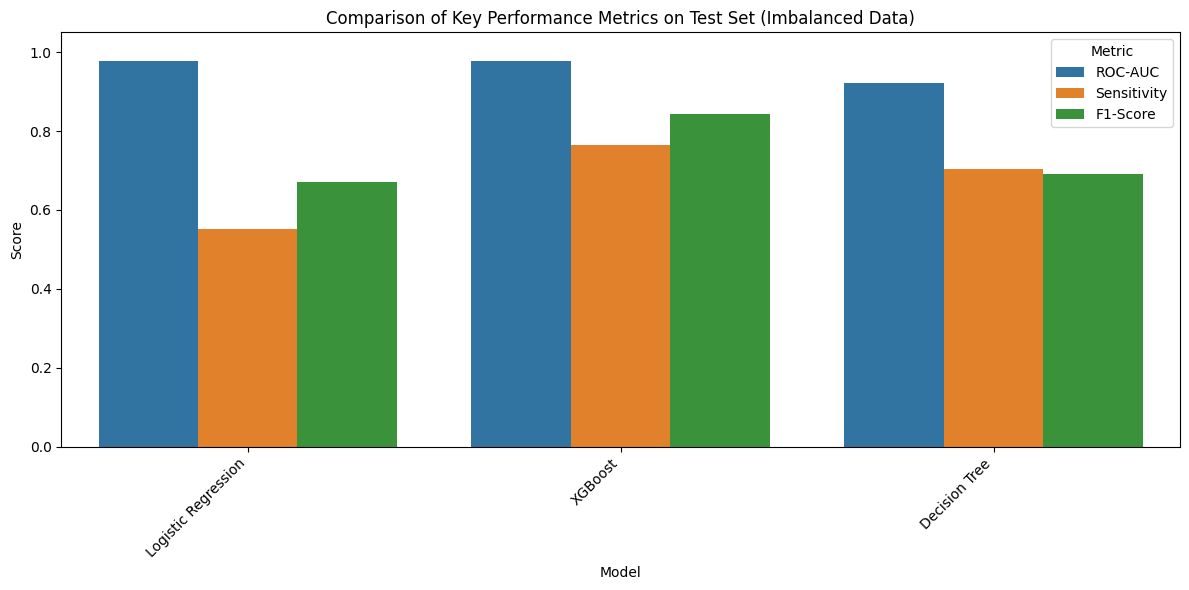

In [ ]:
# Filter the DataFrame to include only test set results
performance_metrics_test = performance_metrics_imb[performance_metrics_imb['Dataset'] == 'Test']

# Melt the DataFrame to long format for easier plotting with Seaborn
performance_metrics_melted = performance_metrics_test.melt(id_vars=['Model', 'Dataset'],
                                                           value_vars=['ROC-AUC', 'Sensitivity', 'F1-Score'],
                                                           var_name='Metric',
                                                           value_name='Score')

# Create a bar plot to compare the metrics across models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=performance_metrics_melted)
plt.title('Comparison of Key Performance Metrics on Test Set (Imbalanced Data)')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Feature Importance (XGBoost)

We examine the feature importance from the best-performing XGBoost model to understand which features contributed most to the predictions.

Top var = 14
2nd Top var = 10
3rd Top var = 12


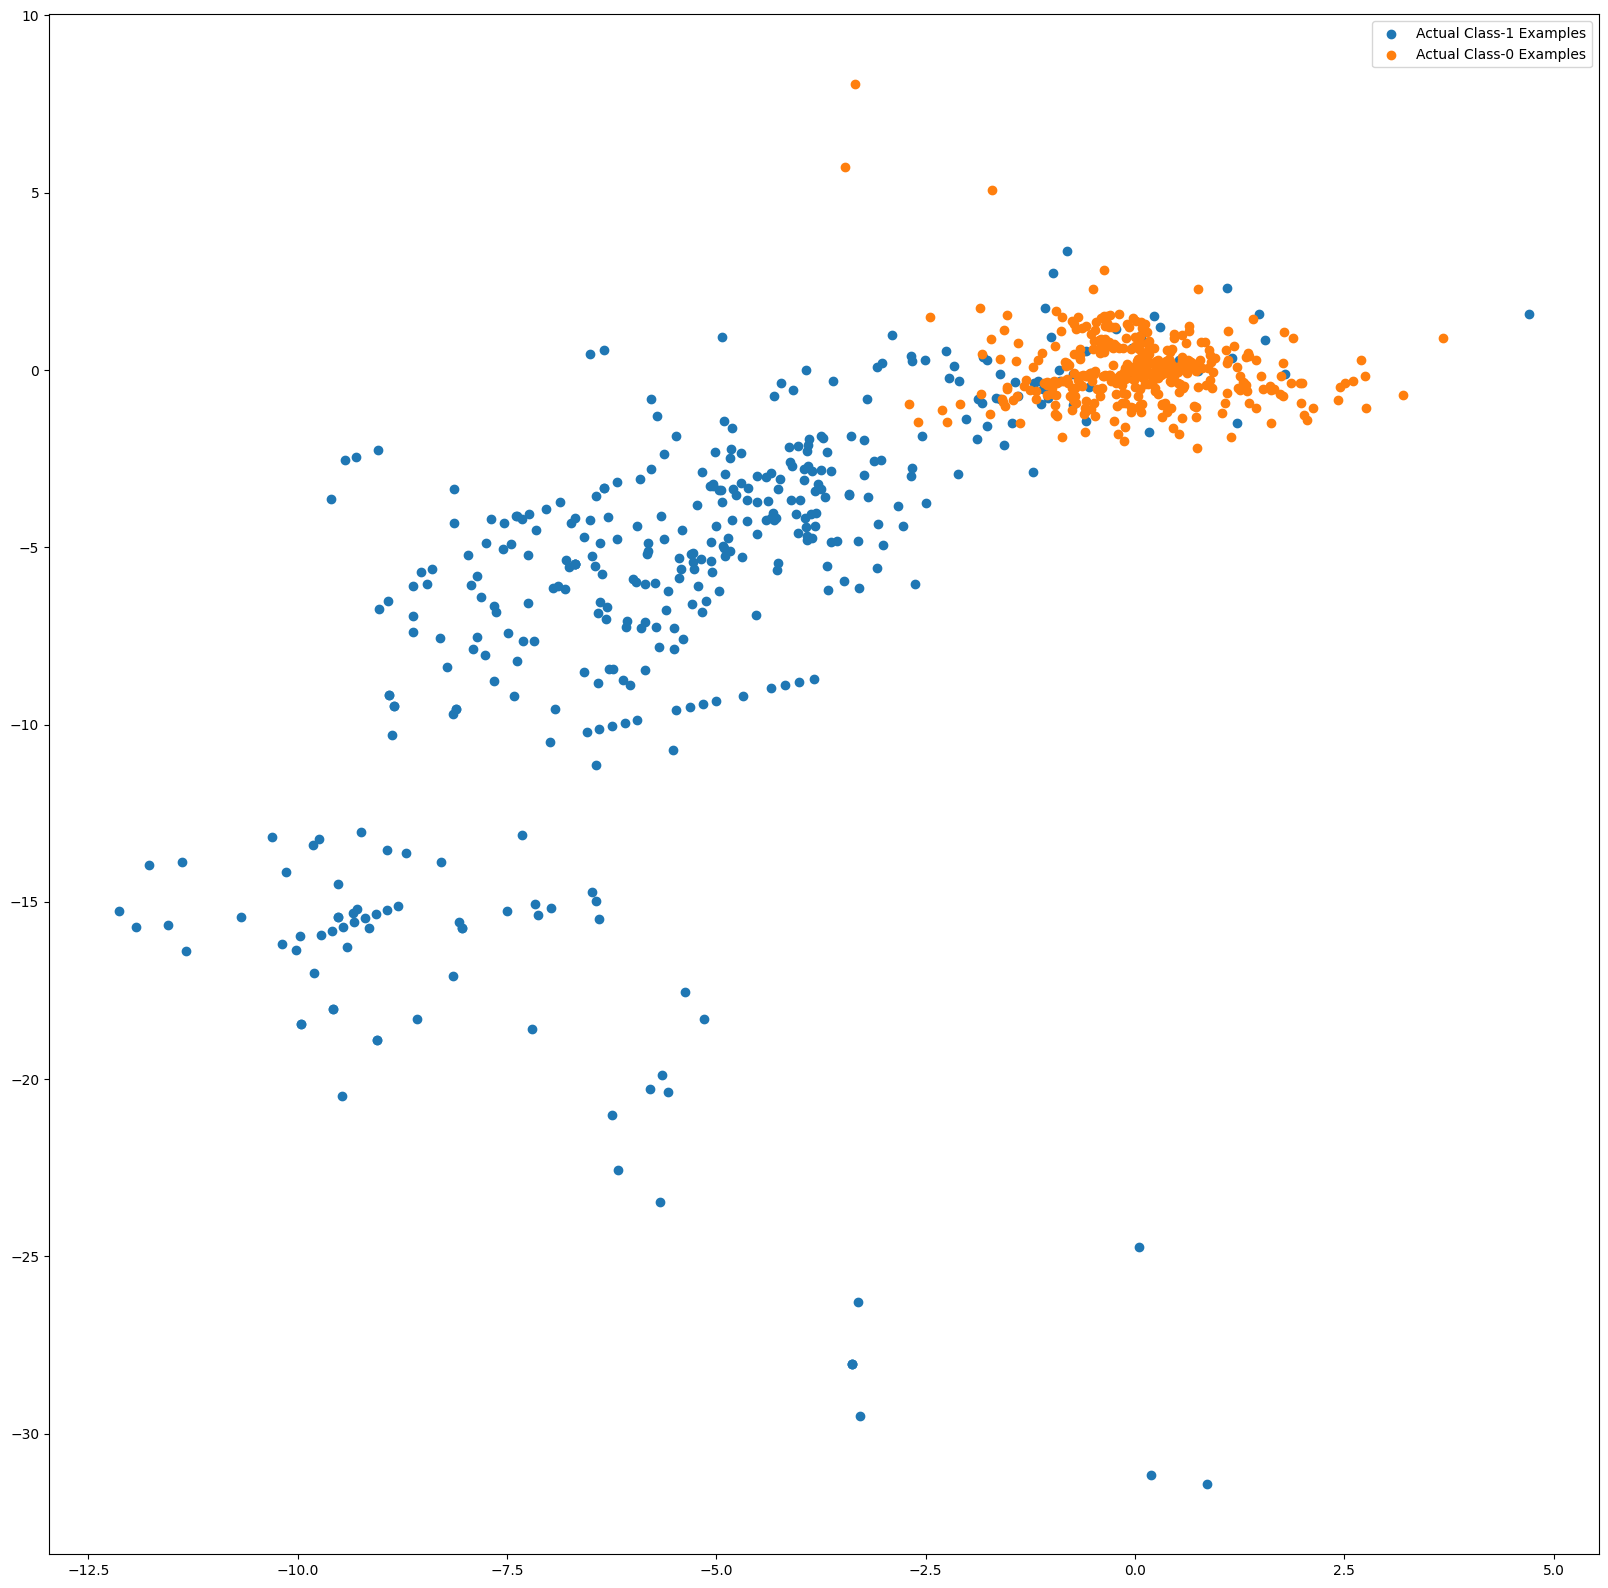

In [ ]:
# Features of XGBoost model

# Getting feature importances from the trained XGBoost model
var_imp = xgb_imb_model.feature_importances_

# Getting the indices of features sorted by importance in descending order
sorted_idx = np.argsort(var_imp)[::-1]

# Printing the top 3 most important features (using 1-based indexing for clarity)
print('Top var =', sorted_idx[0] + 1)
print('2nd Top var =', sorted_idx[1] + 1)
print('3rd Top var =', sorted_idx[2] + 1)

# Getting the indices of the top 2 most important features
top_var_index = sorted_idx[0]
second_top_var_index = sorted_idx[1]

# Separating fraudulent and non-fraudulent examples from the training data
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

# Shuffling the non-fraudulent examples to randomly select a subset for plotting
np.random.shuffle(X_train_0)

# Setting the figure size for the plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

# Plotting the top 2 most important features for actual class 1 (fraudulent) examples
plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
# Plotting a subset of non-fraudulent examples for comparison
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

#### Optimal Threshold Selection (XGBoost)

We determine the optimal probability threshold for the XGBoost model based on the ROC curve, aiming to maximize the difference between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity).

In [ ]:
# Printing the ROC-AUC score for the training set
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))

# Calculating the ROC curve, thresholds, and finding the optimal threshold
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)

# Finding the threshold that maximizes the difference between TPR and FPR (Youden's J statistic)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Optimal Threshold=",threshold)

Train auc = 0.9984054020716506
Optimal Threshold= 0.002238068


# Handling Data Imbalance

To address the significant class imbalance in the dataset, we will explore different data balancing techniques and evaluate their impact on model performance.

## Undersampling

Undersampling involves reducing the number of instances in the majority class (non-fraudulent transactions) to match the number of instances in the minority class (fraudulent transactions).

In [ ]:
# Importing RandomUnderSampler for undersampling the majority class
from imblearn.under_sampling import RandomUnderSampler
# Importing Counter to check class distribution
from collections import Counter

##### Applying Random Undersampling

We apply Random Undersampling to the training data to balance the class distribution.

In [ ]:
# instantiating the random undersampler with a fixed random state for reproducibility
rus = RandomUnderSampler(random_state=42)

# resampling X_train and y_train to balance the class distribution
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

##### Checking Class Distribution After Undersampling

We verify the class distribution after applying Random Undersampling.

### Model Building on Balanced Data with Undersampling

We train various models on the balanced dataset created using Random Undersampling.

### Logistic Regression (Undersampling)

We train a Logistic Regression model on the undersampled data.

#### Tuning Hyperparameter C (Undersampling)

We tune the hyperparameter `C` for the Logistic Regression model on the undersampled data.

In [ ]:
# hyperparameter tuning with Logistic Regression on undersampled data

# Creating KFold object with 5 splits for cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params for tuning the 'C' parameter
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc for evaluation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the GridSearchCV model on the undersampled training data
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

#### Cross-validation Results (Undersampling)

We examine the cross-validation results for Logistic Regression on undersampled data.

In [ ]:
# Displaying the results of the grid search cross-validation in a DataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)
display(cv_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008406,0.000345,0.005020,0.000185,0.01,{'C': 0.01},0.982811,0.941847,0.991004,0.997721,0.990501,0.980777,0.020029,1,0.986917,0.993982,0.986050,0.984204,0.986651,0.987561,0.003348
1,0.009433,0.000206,0.005035,0.000150,0.10,{'C': 0.1},0.987631,0.941205,0.991807,0.998209,0.983623,0.980495,0.020230,2,0.989225,0.995898,0.988590,0.986566,0.989084,0.989872,0.003160
2,0.012029,0.002258,0.005540,0.000777,1.00,{'C': 1},0.989076,0.942329,0.988916,0.998697,0.969374,0.977679,0.020082,3,0.990787,0.996593,0.990586,0.988806,0.991938,0.991742,0.002624
3,0.011597,0.000386,0.005148,0.000100,10.00,{'C': 10},0.989398,0.942972,0.986988,0.998860,0.962168,0.976077,0.020518,4,0.991241,0.996724,0.991210,0.989389,0.992913,0.992296,0.002479
4,0.012650,0.001722,0.005172,0.000180,100.00,{'C': 100},0.989558,0.941847,0.986667,0.998860,0.957746,0.974936,0.021513,5,0.991210,0.996734,0.991190,0.989530,0.993084,0.992350,0.002464
5,0.012701,0.001500,0.005660,0.001296,1000.00,{'C': 1000},0.989558,0.941205,0.986345,0.998860,0.958402,0.974874,0.021576,6,0.991190,0.996714,0.991190,0.989570,0.993145,0.992362,0.002453


#### Plotting AUC vs. C (Undersampling)

We visualize the relationship between C and AUC for Logistic Regression on undersampled data.

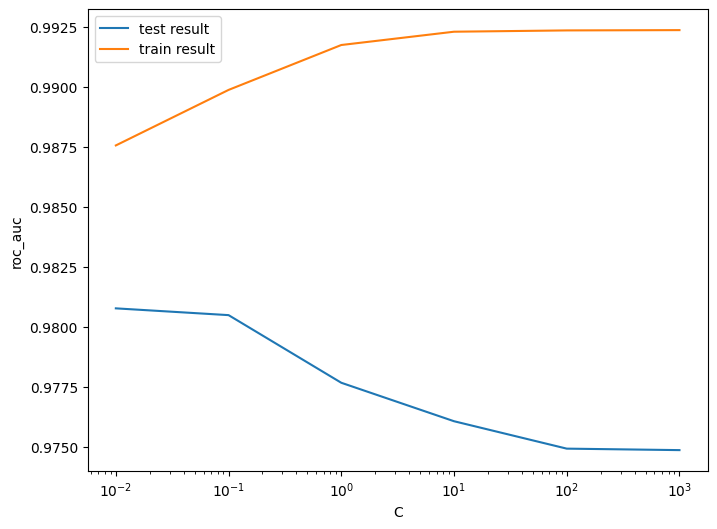

In [ ]:
# plot of C versus train and validation scores

# Plotting the mean test and train ROC-AUC scores for different values of 'C'
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log') # Using a log scale for the x-axis ('C')
plt.show()

#### Best Hyperparameter and Score (Undersampling)

We identify the best C and ROC-AUC score for Logistic Regression on undersampled data.

In [ ]:
# Printing the best ROC-AUC score and the corresponding value of 'C' from the grid search
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9807768818388434 at C = 0.01


#### Logistic Regression with Optimal C (Undersampling)

We train a Logistic Regression model with the optimal C on the undersampled data.

In [ ]:
# Instantiate the Logistic Regression model with the best 'C' found from GridSearchCV
logistic_bal_rus = LogisticRegression(C=0.01, random_state=42)

##### Training the Model (Undersampling)

We fit the Logistic Regression model on the undersampled training data.

In [ ]:
# Fit the Logistic Regression model on the undersampled training data
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

# Displaying the trained model
display(logistic_bal_rus_model)

LogisticRegression(C=0.01, random_state=42)

##### Prediction on the Training Set (Undersampling)

We make predictions on the undersampled training set.

In [ ]:
# Predictions on the undersampled train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

##### Confusion Matrix (Training Set - Undersampling)

We calculate and display the confusion matrix for the undersampled training set.

In [ ]:
# Confusion matrix for the undersampled training set
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[390   4]
 [ 45 349]]


##### Classification Metrics (Training Set - Undersampling)

We calculate and display various classification metrics for the undersampled training set.

In [ ]:
# Extracting True Positives, True Negatives, False Positives, and False Negatives from the confusion matrix
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Calculating and printing various evaluation metrics for the undersampled training set
# Accuracy: Overall proportion of correct predictions
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity (Recall): Proportion of actual positive instances correctly identified
print("Sensitivity:-",TP / float(TP+FN))

# Specificity: Proportion of actual negative instances correctly identified
print("Specificity:-", TN / float(TN+FP))

# F1-Score: Harmonic mean of precision and recall (using y_train_rus and y_train_pred)
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9378172588832487
Sensitivity:- 0.8857868020304569
Specificity:- 0.9898477157360406
F1-Score:- 0.9344042838018741


##### Classification Report (Training Set - Undersampling)

We display the classification report for the undersampled training set.

In [ ]:
# Printing the classification report for the undersampled training set
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       394
           1       0.99      0.89      0.93       394

    accuracy                           0.94       788
   macro avg       0.94      0.94      0.94       788
weighted avg       0.94      0.94      0.94       788



##### Predicted Probabilities (Training Set - Undersampling)

We obtain the predicted probabilities for the positive class on the undersampled training set.

In [ ]:
# Predicted probability for the positive class on the undersampled training set
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

##### ROC-AUC Score (Training Set - Undersampling)

We calculate and display the ROC-AUC score for the undersampled training set.

In [ ]:
# roc_auc score for the undersampled training set
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
print("ROC-AUC:", auc)

ROC-AUC: 0.9873354118889949


##### ROC Curve (Training Set - Undersampling)

We plot the ROC curve for the undersampled training set.

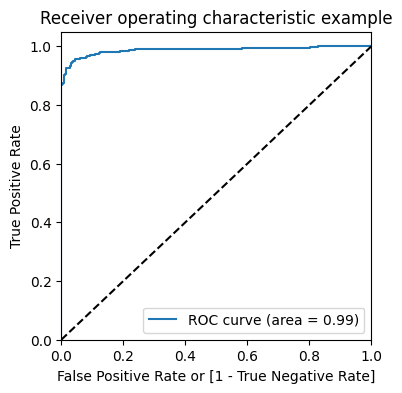

In [ ]:
# Plot the ROC curve for the undersampled training set
draw_roc(y_train_rus, y_train_pred_proba)

#### Model Evaluation on the Test Set (Undersampling)

We evaluate the performance of the trained Logistic Regression model (undersampling) on the original, imbalanced test set.

##### Prediction on the Test Set (Undersampling)

We make predictions on the original test set.

In [ ]:
# Prediction on the original test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

##### Confusion Matrix (Test Set - Undersampling)

We calculate and display the confusion matrix for the original test set.

In [ ]:
# Confusion matrix for the original test set
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56365   499]
 [   16    82]]


##### Classification Metrics (Test Set - Undersampling)

We calculate and display various classification metrics for the original test set.

In [ ]:
# Extracting True Positives, True Negatives, False Positives, and False Negatives from the confusion matrix
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Calculating and printing various evaluation metrics for the original test set
# Accuracy: Overall proportion of correct predictions
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity (Recall): Proportion of actual positive instances correctly identified
print("Sensitivity:-",TP / float(TP+FN))

# Specificity: Proportion of actual negative instances correctly identified
print("Specificity:-", TN / float(TN+FP))

# F1-Score: Harmonic mean of precision and recall (using y_test and y_test_pred)
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9909588848706155
Sensitivity:- 0.8367346938775511
Specificity:- 0.9912246764209341
F1-Score:- 0.24153166421207659


##### Classification Report (Test Set - Undersampling)

We display the classification report for the original test set.

In [ ]:
# Printing the classification report for the original test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.84      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.91      0.62     56962
weighted avg       1.00      0.99      0.99     56962



##### Predicted Probabilities (Test Set - Undersampling)

We obtain the predicted probabilities for the positive class on the original test set.

In [ ]:
# Predicted probability for the positive class on the original test set
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

##### ROC-AUC Score (Test Set - Undersampling)

We calculate and display the ROC-AUC score for the original test set.

In [ ]:
# roc_auc score for the original test set
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC-AUC:", auc)

ROC-AUC: 0.981602182938454


##### ROC Curve (Test Set - Undersampling)

We plot the ROC curve for the original test set.

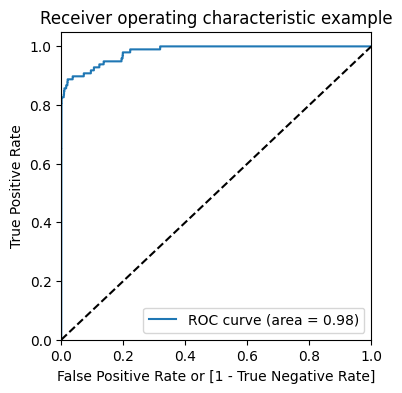

In [ ]:
# Plot the ROC curve for the original test set
draw_roc(y_test, y_test_pred_proba)

### XGBoost Model (Undersampling)
Train the training data and evaluate it on the original test set by calculating and printing the confusion matrix, classification report, ROC-AUC score, and plotting the ROC curve.



XGBoost Confusion Matrix (Undersampling):
 [[54431  2433]
 [   10    88]]

XGBoost Classification Report (Undersampling):
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.90      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962


XGBoost ROC-AUC Score (Undersampling): 0.975616365004077

XGBoost ROC Curve (Undersampling):


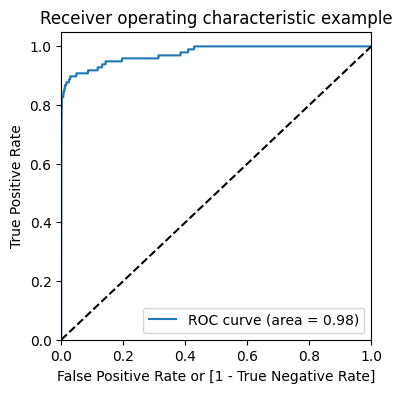

In [ ]:
# Train XGBoost model on undersampled data
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic',
         'random_state':42} # Added random_state

xgb_bal_rus_model = XGBClassifier(**params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

# Evaluate XGBoost model on the test set
y_test_pred_xgb_rus = xgb_bal_rus_model.predict(X_test)
confusion_xgb_rus = metrics.confusion_matrix(y_test, y_test_pred_xgb_rus)

print("XGBoost Confusion Matrix (Undersampling):\n", confusion_xgb_rus)
print("\nXGBoost Classification Report (Undersampling):\n", classification_report(y_test, y_test_pred_xgb_rus))

y_test_pred_proba_xgb_rus = xgb_bal_rus_model.predict_proba(X_test)[:,1]
auc_xgb_rus = metrics.roc_auc_score(y_test, y_test_pred_proba_xgb_rus)
print("\nXGBoost ROC-AUC Score (Undersampling):", auc_xgb_rus)

print("\nXGBoost ROC Curve (Undersampling):")
draw_roc(y_test, y_test_pred_proba_xgb_rus)

# Calculate and print the total cost (assuming cost_matrix is defined)
# total_cost_xgb_rus = calculate_total_cost(confusion_xgb_rus, cost_matrix)
# print("\nTotal Cost (XGBoost - Undersampling):", total_cost_xgb_rus)

### Decision Tree Model (Undersampling)
Training data and evaluate it on the original test set by calculating and printing the confusion matrix, classification report, ROC-AUC score, and plotting the ROC curve.



Decision Tree Confusion Matrix (Undersampling):
 [[49418  7446]
 [   11    87]]

Decision Tree Classification Report (Undersampling):
               precision    recall  f1-score   support

           0       1.00      0.87      0.93     56864
           1       0.01      0.89      0.02        98

    accuracy                           0.87     56962
   macro avg       0.51      0.88      0.48     56962
weighted avg       1.00      0.87      0.93     56962


Decision Tree ROC-AUC Score (Undersampling): 0.9503474275894938

Decision Tree ROC Curve (Undersampling):


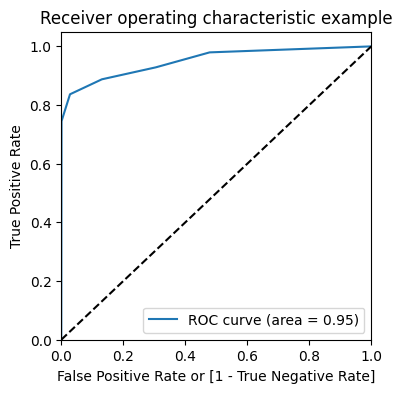

In [ ]:
# Train Decision Tree model on undersampled data
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)
dt_bal_rus_model.fit(X_train_rus, y_train_rus)

# Evaluate Decision Tree model on the test set
y_test_pred_dt_rus = dt_bal_rus_model.predict(X_test)
confusion_dt_rus = metrics.confusion_matrix(y_test, y_test_pred_dt_rus)

print("Decision Tree Confusion Matrix (Undersampling):\n", confusion_dt_rus)
print("\nDecision Tree Classification Report (Undersampling):\n", classification_report(y_test, y_test_pred_dt_rus))

y_test_pred_proba_dt_rus = dt_bal_rus_model.predict_proba(X_test)[:,1]
auc_dt_rus = metrics.roc_auc_score(y_test, y_test_pred_proba_dt_rus)
print("\nDecision Tree ROC-AUC Score (Undersampling):", auc_dt_rus)

print("\nDecision Tree ROC Curve (Undersampling):")
draw_roc(y_test, y_test_pred_proba_dt_rus)

# Calculate and print the total cost (assuming cost_matrix is defined)
# total_cost_dt_rus = calculate_total_cost(confusion_dt_rus, cost_matrix)
# print("\nTotal Cost (Decision Tree - Undersampling):", total_cost_dt_rus)

### Oversampling with Smote
Import the SMOTE class and apply it to the training data to oversample the minority class, then check the new class distribution.Import the SMOTE class and apply it to the training data to oversample the minority class, then check the new class distribution.


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution after SMOTE: Counter({0: 227451, 1: 227451})



Train and evaluate Logistic Regression, XGBoost,and Decision Tree models on the SMOTE-balanced training data and evaluate them on the original test set, then store the metrics in a DataFrame.


#### Logistic Regression

Logistic Regression Confusion Matrix (SMOTE):
 [[55521  1343]
 [   11    87]]

Logistic Regression Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.89      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Logistic Regression ROC-AUC Score (SMOTE): 0.9746451971334398

Logistic Regression ROC Curve (SMOTE):


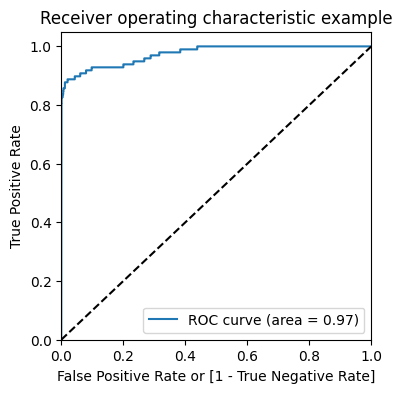

In [ ]:
# Train and evaluate Logistic Regression model on SMOTE-balanced data
logistic_bal_smote = LogisticRegression(C=0.01, random_state=42) # Added random_state
logistic_bal_smote.fit(X_train_smote, y_train_smote)
y_test_pred_lr_smote = logistic_bal_smote.predict(X_test)
confusion_lr_smote = metrics.confusion_matrix(y_test, y_test_pred_lr_smote)
print("Logistic Regression Confusion Matrix (SMOTE):\n", confusion_lr_smote)
print("\nLogistic Regression Classification Report (SMOTE):\n", classification_report(y_test, y_test_pred_lr_smote))
y_test_pred_proba_lr_smote = logistic_bal_smote.predict_proba(X_test)[:,1]
auc_lr_smote = metrics.roc_auc_score(y_test, y_test_pred_proba_lr_smote)
print("\nLogistic Regression ROC-AUC Score (SMOTE):", auc_lr_smote)
print("\nLogistic Regression ROC Curve (SMOTE):")
draw_roc(y_test, y_test_pred_proba_lr_smote)

#### XGBoost


XGBoost Confusion Matrix (SMOTE):
 [[56452   412]
 [   13    85]]

XGBoost Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.87      0.29        98

    accuracy                           0.99     56962
   macro avg       0.59      0.93      0.64     56962
weighted avg       1.00      0.99      1.00     56962


XGBoost ROC-AUC Score (SMOTE): 0.965014000465127

XGBoost ROC Curve (SMOTE):


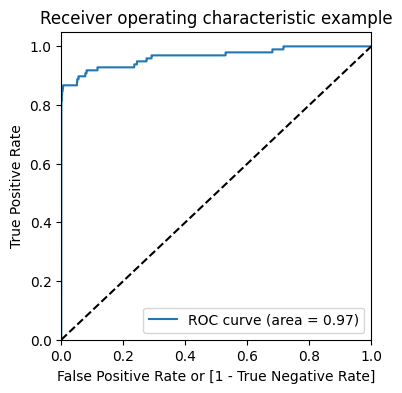

In [ ]:
# Train and evaluate XGBoost model on SMOTE-balanced data
params = {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators':200, 'subsample':0.3, 'objective':'binary:logistic', 'random_state':42} # Added random_state
xgb_bal_smote_model = XGBClassifier(**params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)
y_test_pred_xgb_smote = xgb_bal_smote_model.predict(X_test)
confusion_xgb_smote = metrics.confusion_matrix(y_test, y_test_pred_xgb_smote)
print("\nXGBoost Confusion Matrix (SMOTE):\n", confusion_xgb_smote)
print("\nXGBoost Classification Report (SMOTE):\n", classification_report(y_test, y_test_pred_xgb_smote))
y_test_pred_proba_xgb_smote = xgb_bal_smote_model.predict_proba(X_test)[:,1]
auc_xgb_smote = metrics.roc_auc_score(y_test, y_test_pred_proba_xgb_smote)
print("\nXGBoost ROC-AUC Score (SMOTE):", auc_xgb_smote)
print("\nXGBoost ROC Curve (SMOTE):")
draw_roc(y_test, y_test_pred_proba_xgb_smote)

#### Decision Tree


Decision Tree Confusion Matrix (SMOTE):
 [[56055   809]
 [   16    82]]

Decision Tree Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.84      0.17        98

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.99      0.99     56962


Decision Tree ROC-AUC Score (SMOTE): 0.9200020205746902

Decision Tree ROC Curve (SMOTE):


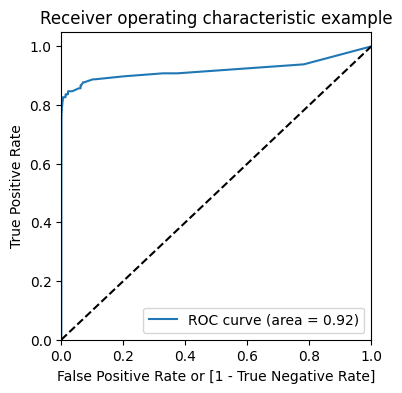

In [ ]:
# Train and evaluate Decision Tree model on SMOTE-balanced data
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=50, min_samples_split=100)
dt_bal_smote_model.fit(X_train_smote, y_train_smote)
y_test_pred_dt_smote = dt_bal_smote_model.predict(X_test)
confusion_dt_smote = metrics.confusion_matrix(y_test, y_test_pred_dt_smote)
print("\nDecision Tree Confusion Matrix (SMOTE):\n", confusion_dt_smote)
print("\nDecision Tree Classification Report (SMOTE):\n", classification_report(y_test, y_test_pred_dt_smote))
y_test_pred_proba_dt_smote = dt_bal_smote_model.predict_proba(X_test)[:,1]
auc_dt_smote = metrics.roc_auc_score(y_test, y_test_pred_proba_dt_smote)
print("\nDecision Tree ROC-AUC Score (SMOTE):", auc_dt_smote)
print("\nDecision Tree ROC Curve (SMOTE):")
draw_roc(y_test, y_test_pred_proba_dt_smote)

#### Store Metrics (SMOTE) in one DataFrame


In [ ]:
# Store metrics in a DataFrame
metrics_smote = pd.DataFrame({
    'Model': ['Logistic Regression (SMOTE)', 'XGBoost (SMOTE)', 'Decision Tree (SMOTE)'],
    'Accuracy': [metrics.accuracy_score(y_test, y_test_pred_lr_smote),
                 metrics.accuracy_score(y_test, y_test_pred_xgb_smote),
                 metrics.accuracy_score(y_test, y_test_pred_dt_smote)],
    'Sensitivity': [confusion_lr_smote[1,1] / (confusion_lr_smote[1,1] + confusion_lr_smote[1,0]),
                    confusion_xgb_smote[1,1] / (confusion_xgb_smote[1,1] + confusion_xgb_smote[1,0]),
                    confusion_dt_smote[1,1] / (confusion_dt_smote[1,1] + confusion_dt_smote[1,0])],
    'Specificity': [confusion_lr_smote[0,0] / (confusion_lr_smote[0,0] + confusion_lr_smote[0,1]),
                    confusion_xgb_smote[0,0] / (confusion_xgb_smote[0,0] + confusion_xgb_smote[0,1]),
                    confusion_dt_smote[0,0] / (confusion_dt_smote[0,0] + confusion_dt_smote[0,1])],
    'F1-Score': [f1_score(y_test, y_test_pred_lr_smote),
                 f1_score(y_test, y_test_pred_xgb_smote),
                 f1_score(y_test, y_test_pred_dt_smote)],
    'ROC-AUC': [auc_lr_smote, auc_xgb_smote, auc_dt_smote]
})

display(metrics_smote)

,Model,Accuracy,Sensitivity,Specificity,F1-Score,ROC-AUC
0,Logistic Regression (SMOTE),0.976230,0.887755,0.976382,0.113874,0.974645
1,XGBoost (SMOTE),0.992539,0.867347,0.992755,0.285714,0.965014
2,Decision Tree (SMOTE),0.985517,0.836735,0.985773,0.165824,0.920002


### Model Building and Evaluation (SMOTE-ENN)

Import the SMOTEENN class and apply it to the training data to balance the class distribution using a combination of oversampling with SMOTE and undersampling with Edited Nearest Neighbors, then check the new class distribution.

In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter

smote_enn = SMOTEENN(random_state=42)

X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)

print("Class distribution after SMOTE-ENN:", Counter(y_train_smote_enn))

Class distribution after SMOTE-ENN: Counter({1: 227451, 0: 227066})


Train and evaluate Logistic Regression, XGBoost, and Decision Tree models on the SMOTE-ENN-balanced training data and evaluate them on the original test set, then store the metrics in a DataFrame.

#### Logistic Regression

Logistic Regression Confusion Matrix (SMOTE-ENN):
 [[55455  1409]
 [   11    87]]

Logistic Regression Classification Report (SMOTE-ENN):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.89      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Logistic Regression ROC-AUC Score (SMOTE-ENN): 0.9750453642346077

Logistic Regression ROC Curve (SMOTE-ENN):


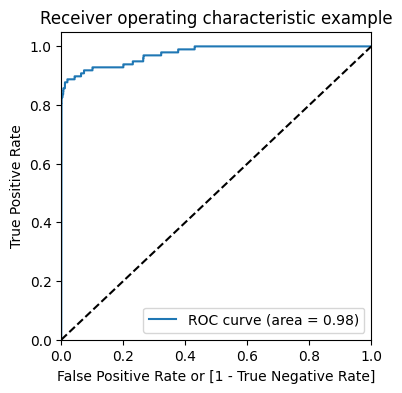

In [ ]:
# Train and evaluate Logistic Regression model on SMOTE-ENN-balanced data
logistic_bal_smote_enn = LogisticRegression(C=0.01, random_state=42) # Added random_state
logistic_bal_smote_enn.fit(X_train_smote_enn, y_train_smote_enn)
y_test_pred_lr_smote_enn = logistic_bal_smote_enn.predict(X_test)
confusion_lr_smote_enn = metrics.confusion_matrix(y_test, y_test_pred_lr_smote_enn)
print("Logistic Regression Confusion Matrix (SMOTE-ENN):\n", confusion_lr_smote_enn)
print("\nLogistic Regression Classification Report (SMOTE-ENN):\n", classification_report(y_test, y_test_pred_lr_smote_enn))
y_test_pred_proba_lr_smote_enn = logistic_bal_smote_enn.predict_proba(X_test)[:,1]
auc_lr_smote_enn = metrics.roc_auc_score(y_test, y_test_pred_proba_lr_smote_enn)
print("\nLogistic Regression ROC-AUC Score (SMOTE-ENN):", auc_lr_smote_enn)
print("\nLogistic Regression ROC Curve (SMOTE-ENN):")
draw_roc(y_test, y_test_pred_proba_lr_smote_enn)

#### XGBoost


XGBoost Confusion Matrix (SMOTE-ENN):
 [[56405   459]
 [   13    85]]

XGBoost Classification Report (SMOTE-ENN):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.87      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.93      0.63     56962
weighted avg       1.00      0.99      0.99     56962


XGBoost ROC-AUC Score (SMOTE-ENN): 0.9659257713355461

XGBoost ROC Curve (SMOTE-ENN):


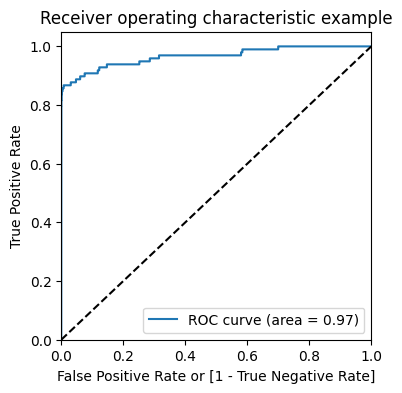

In [ ]:
# Train and evaluate XGBoost model on SMOTE-ENN-balanced data
params = {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators':200, 'subsample':0.3, 'objective':'binary:logistic', 'random_state':42} # Added random_state
xgb_bal_smote_enn_model = XGBClassifier(**params)
xgb_bal_smote_enn_model.fit(X_train_smote_enn, y_train_smote_enn)
y_test_pred_xgb_smote_enn = xgb_bal_smote_enn_model.predict(X_test)
confusion_xgb_smote_enn = metrics.confusion_matrix(y_test, y_test_pred_xgb_smote_enn)
print("\nXGBoost Confusion Matrix (SMOTE-ENN):\n", confusion_xgb_smote_enn)
print("\nXGBoost Classification Report (SMOTE-ENN):\n", classification_report(y_test, y_test_pred_xgb_smote_enn))
y_test_pred_proba_xgb_smote_enn = xgb_bal_smote_enn_model.predict_proba(X_test)[:,1]
auc_xgb_smote_enn = metrics.roc_auc_score(y_test, y_test_pred_proba_xgb_smote_enn)
print("\nXGBoost ROC-AUC Score (SMOTE-ENN):", auc_xgb_smote_enn)
print("\nXGBoost ROC Curve (SMOTE-ENN):")
draw_roc(y_test, y_test_pred_proba_xgb_smote_enn)

#### Decision Tree

In [ ]:
# Train and evaluate Decision Tree model on SMOTE-ENN-balanced data
dt_bal_smote_enn_model = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=50, min_samples_split=100)
dt_bal_smote_enn_model.fit(X_train_smote_enn, y_train_smote_enn)
y_test_pred_dt_smote_enn = dt_bal_smote_enn_model.predict(X_test)
confusion_dt_smote_enn = metrics.confusion_matrix(y_test, y_test_pred_dt_smote_enn)
print("\nDecision Tree Confusion Matrix (SMOTE-ENN):\n", confusion_dt_smote_enn)
print("\nDecision Tree Classification Report (SMOTE-ENN):\n", classification_report(y_test, y_test_pred_dt_smote_enn))
y_test_pred_proba_dt_smote_enn = dt_bal_smote_enn_model.predict_proba(X_test)[:,1]
auc_dt_smote_enn = metrics.roc_auc_score(y_test, y_test_pred_proba_dt_smote_enn)
print("\nDecision Tree ROC-AUC Score (SMOTE-ENN):", auc_dt_smote_enn)
print("\nDecision Tree ROC Curve (SMOTE-ENN):")
draw_roc(y_test, y_test_pred_proba_dt_smote_enn)

#### Store Metrics (SMOTE-ENN) in one DataFrame

In [ ]:
# Store metrics in a DataFrame
metrics_smote_enn = pd.DataFrame({
    'Model': ['Logistic Regression (SMOTE-ENN)', 'XGBoost (SMOTE-ENN)', 'Decision Tree (SMOTE-ENN)'],
    'Accuracy': [metrics.accuracy_score(y_test, y_test_pred_lr_smote_enn),
                 metrics.accuracy_score(y_test, y_test_pred_xgb_smote_enn),
                 metrics.accuracy_score(y_test, y_test_pred_dt_smote_enn)],
    'Sensitivity': [confusion_lr_smote_enn[1,1] / (confusion_lr_smote_enn[1,1] + confusion_lr_smote_enn[1,0]),
                    confusion_xgb_smote_enn[1,1] / (confusion_xgb_smote_enn[1,1] + confusion_xgb_smote_enn[1,0]),
                    confusion_dt_smote_enn[1,1] / (confusion_dt_smote_enn[1,1] + confusion_dt_smote_enn[1,0])],
    'Specificity': [confusion_lr_smote_enn[0,0] / (confusion_lr_smote_enn[0,0] + confusion_lr_smote_enn[0,1]),
                    confusion_xgb_smote_enn[0,0] / (confusion_xgb_smote_enn[0,0] + confusion_xgb_smote_enn[0,1]),
                    confusion_dt_smote_enn[0,0] / (confusion_dt_smote_enn[0,0] + confusion_dt_smote_enn[0,1])],
    'F1-Score': [f1_score(y_test, y_test_pred_lr_smote_enn),
                 f1_score(y_test, y_test_pred_xgb_smote_enn),
                 f1_score(y_test, y_test_pred_dt_smote_enn)],
    'ROC-AUC': [auc_lr_smote_enn, auc_xgb_smote_enn, auc_dt_smote_enn]
})

display(metrics_smote_enn)

,Model,Accuracy,Sensitivity,Specificity,F1-Score,ROC-AUC
0,Logistic Regression (SMOTE-ENN),0.975071,0.887755,0.975222,0.109159,0.975045
1,XGBoost (SMOTE-ENN),0.991714,0.867347,0.991928,0.264798,0.965926
2,Decision Tree (SMOTE-ENN),0.985288,0.806122,0.985597,0.158635,0.911012


### Model Comparison Across Balancing Techniques
We will now compare the performance of all models trained on the original imbalanced data, undersampled data, SMOTE-balanced data, and SMOTE-ENN-balanced data. We will focus on key metrics like ROC-AUC, Sensitivity (Recall), and F1-Score on the test set.


In [ ]:
# Create DataFrames for metrics from undersampling, SMOTE, and SMOTE-ENN
metrics_undersampling = pd.DataFrame({
    'Model': ['Logistic Regression (Undersampling)', 'XGBoost (Undersampling)', 'Decision Tree (Undersampling)'],
    'Accuracy': [metrics.accuracy_score(y_test, y_test_pred),
                 metrics.accuracy_score(y_test, y_test_pred_xgb_rus),
                 metrics.accuracy_score(y_test, y_test_pred_dt_rus)],
    'Sensitivity': [confusion[1,1] / (confusion[1,1] + confusion[1,0]),
                    confusion_xgb_rus[1,1] / (confusion_xgb_rus[1,1] + confusion_xgb_rus[1,0]),
                    confusion_dt_rus[1,1] / (confusion_dt_rus[1,1] + confusion_dt_rus[1,0])],
    'Specificity': [confusion[0,0] / (confusion[0,0] + confusion[0,1]),
                    confusion_xgb_rus[0,0] / (confusion_xgb_rus[0,0] + confusion_xgb_rus[0,1]),
                    confusion_dt_rus[0,0] / (confusion_dt_rus[0,0] + confusion_dt_rus[0,1])],
    'F1-Score': [f1_score(y_test, y_test_pred),
                 f1_score(y_test, y_test_pred_xgb_rus),
                 f1_score(y_test, y_test_pred_dt_rus)],
    'ROC-AUC': [auc, auc_xgb_rus, auc_dt_rus]
})

# Combine all metrics DataFrames
all_metrics = pd.concat([performance_metrics_test, metrics_undersampling, metrics_smote, metrics_smote_enn], ignore_index=True)

# Display the combined metrics
display(all_metrics)

,Model,Dataset,Accuracy,Sensitivity,Specificity,F1-Score,ROC-AUC
0,Logistic Regression,Test,0.999070,0.551020,0.999842,0.670807,0.978402
1,XGBoost,Test,0.999508,0.765306,0.999912,0.842697,0.977145
2,Decision Tree,Test,0.998912,0.704082,0.999420,0.690000,0.921087
3,Logistic Regression (Undersampling),NaN,0.990959,0.836735,0.991225,0.241532,0.987335
4,XGBoost (Undersampling),NaN,0.957112,0.897959,0.957214,0.067201,0.975616
5,Decision Tree (Undersampling),NaN,0.869088,0.887755,0.869056,0.022802,0.950347
6,Logistic Regression (SMOTE),NaN,0.976230,0.887755,0.976382,0.113874,0.974645
7,XGBoost (SMOTE),NaN,0.992539,0.867347,0.992755,0.285714,0.965014
8,Decision Tree (SMOTE),NaN,0.985517,0.836735,0.985773,0.165824,0.920002
9,Logistic Regression (SMOTE-ENN),NaN,0.975071,0.887755,0.975222,0.109159,0.975045


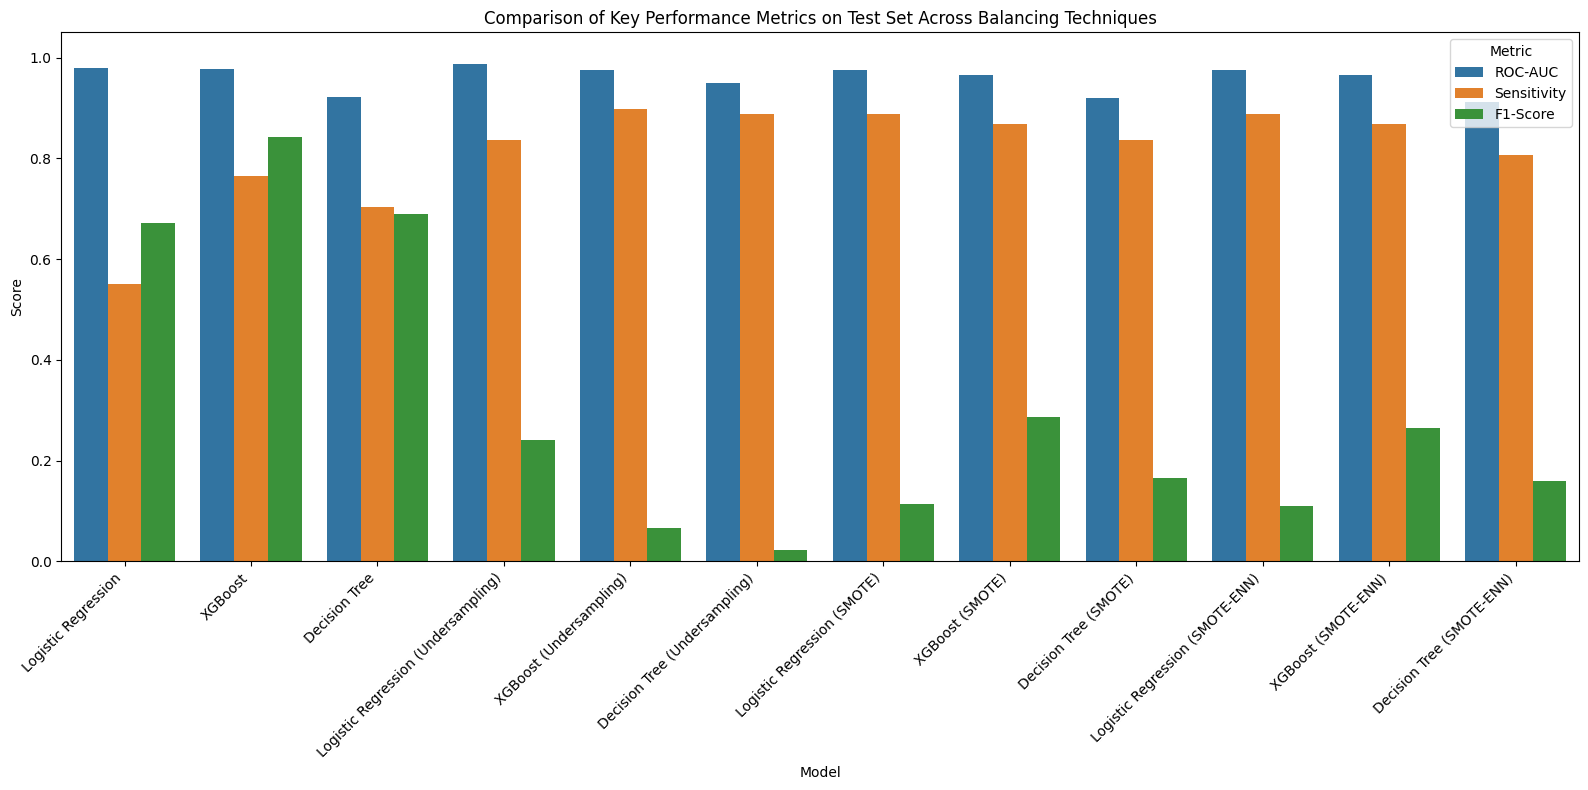

In [ ]:
# Filter the DataFrame to include only test set results
# Assuming 'all_metrics' contains the combined results and 'Dataset' column exists to distinguish test results
performance_metrics_test_balanced = all_metrics[all_metrics['Dataset'] != 'Train'] # Filter out train results if they were included

# Melt the DataFrame to long format for easier plotting with Seaborn
performance_metrics_melted_balanced = performance_metrics_test_balanced.melt(id_vars=['Model', 'Dataset'],
                                                           value_vars=['ROC-AUC', 'Sensitivity', 'F1-Score'],
                                                           var_name='Metric',
                                                           value_name='Score')

# Create a bar plot to compare the metrics across models and balancing techniques
plt.figure(figsize=(16, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=performance_metrics_melted_balanced)
plt.title('Comparison of Key Performance Metrics on Test Set Across Balancing Techniques')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Model Building and Evaluation (ADASYN)
Import the ADASYN class and apply it to the training data to oversample the minority class, then check the new class distribution.



In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

print("Class distribution after ADASYN:", Counter(y_train_adasyn))

Class distribution after ADASYN: Counter({1: 227461, 0: 227451})


Train and evaluate Logistic Regression, XGBoost, and Decision Tree models on the ADASYN-balanced training data and evaluate them on the original test set, then store the metrics in a DataFrame.

#### Logistic Regression

Logistic Regression Confusion Matrix (ADASYN):
 [[51873  4991]
 [    9    89]]

Logistic Regression Classification Report (ADASYN):
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.91      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.91      0.95     56962


Logistic Regression ROC-AUC Score (ADASYN): 0.9729967957920366

Logistic Regression ROC Curve (ADASYN):


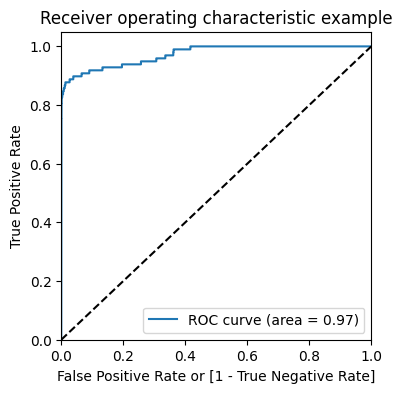

In [ ]:
# Train and evaluate Logistic Regression model on ADASYN-balanced data
logistic_bal_adasyn = LogisticRegression(C=0.01, random_state=42) # Added random_state
logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_test_pred_lr_adasyn = logistic_bal_adasyn.predict(X_test)
confusion_lr_adasyn = metrics.confusion_matrix(y_test, y_test_pred_lr_adasyn)
print("Logistic Regression Confusion Matrix (ADASYN):\n", confusion_lr_adasyn)
print("\nLogistic Regression Classification Report (ADASYN):\n", classification_report(y_test, y_test_pred_lr_adasyn))
y_test_pred_proba_lr_adasyn = logistic_bal_adasyn.predict_proba(X_test)[:,1]
auc_lr_adasyn = metrics.roc_auc_score(y_test, y_test_pred_proba_lr_adasyn)
print("\nLogistic Regression ROC-AUC Score (ADASYN):", auc_lr_adasyn)
print("\nLogistic Regression ROC Curve (ADASYN):")
draw_roc(y_test, y_test_pred_proba_lr_adasyn)

#### XGBoost


XGBoost Confusion Matrix (ADASYN):
 [[55774  1090]
 [   13    85]]

XGBoost Classification Report (ADASYN):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.87      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.56     56962
weighted avg       1.00      0.98      0.99     56962


XGBoost ROC-AUC Score (ADASYN): 0.9651161956059858

XGBoost ROC Curve (ADASYN):


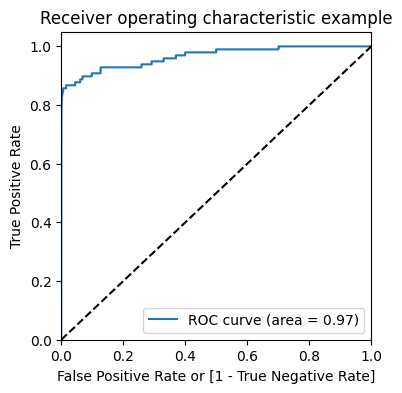

In [ ]:
# Train and evaluate XGBoost model on ADASYN-balanced data
params = {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators':200, 'subsample':0.3, 'objective':'binary:logistic', 'random_state':42} # Added random_state
xgb_bal_adasyn_model = XGBClassifier(**params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)
y_test_pred_xgb_adasyn = xgb_bal_adasyn_model.predict(X_test)
confusion_xgb_adasyn = metrics.confusion_matrix(y_test, y_test_pred_xgb_adasyn)
print("\nXGBoost Confusion Matrix (ADASYN):\n", confusion_xgb_adasyn)
print("\nXGBoost Classification Report (ADASYN):\n", classification_report(y_test, y_test_pred_xgb_adasyn))
y_test_pred_proba_xgb_adasyn = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]
auc_xgb_adasyn = metrics.roc_auc_score(y_test, y_test_pred_proba_xgb_adasyn)
print("\nXGBoost ROC-AUC Score (ADASYN):", auc_xgb_adasyn)
print("\nXGBoost ROC Curve (ADASYN):")
draw_roc(y_test, y_test_pred_proba_xgb_adasyn)

#### Decision Tree

In [ ]:
# Train and evaluate Decision Tree model on ADASYN-balanced data
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=50, min_samples_split=100)
dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)
y_test_pred_dt_adasyn = dt_bal_adasyn_model.predict(X_test)
confusion_dt_adasyn = metrics.confusion_matrix(y_test, y_test_pred_dt_adasyn)
print("\nDecision Tree Confusion Matrix (ADASYN):\n", confusion_dt_adasyn)
print("\nDecision Tree Classification Report (ADASYN):\n", classification_report(y_test, y_test_pred_dt_adasyn))
y_test_pred_proba_dt_adasyn = dt_bal_adasyn_model.predict_proba(X_test)[:,1]
auc_dt_adasyn = metrics.roc_auc_score(y_test, y_test_pred_proba_dt_adasyn)
print("\nDecision Tree ROC-AUC Score (ADASYN):", auc_dt_adasyn)
print("\nDecision Tree ROC Curve (ADASYN):")
draw_roc(y_test, y_test_pred_proba_dt_adasyn)

#### Store metrics (ADASYN) in one DataFrame

In [ ]:
# Store metrics in a DataFrame
metrics_adasyn = pd.DataFrame({
    'Model': ['Logistic Regression (ADASYN)', 'XGBoost (ADASYN)', 'Decision Tree (ADASYN)'],
    'Accuracy': [metrics.accuracy_score(y_test, y_test_pred_lr_adasyn),
                 metrics.accuracy_score(y_test, y_test_pred_xgb_adasyn),
                 metrics.accuracy_score(y_test, y_test_pred_dt_adasyn)],
    'Sensitivity': [confusion_lr_adasyn[1,1] / (confusion_lr_adasyn[1,1] + confusion_lr_adasyn[1,0]),
                    confusion_xgb_adasyn[1,1] / (confusion_xgb_adasyn[1,1] + confusion_xgb_adasyn[1,0]),
                    confusion_dt_adasyn[1,1] / (confusion_dt_adasyn[1,1] + confusion_dt_adasyn[1,0])],
    'Specificity': [confusion_lr_adasyn[0,0] / (confusion_lr_adasyn[0,0] + confusion_lr_adasyn[0,1]),
                    confusion_xgb_adasyn[0,0] / (confusion_xgb_adasyn[0,0] + confusion_xgb_adasyn[0,1]),
                    confusion_dt_adasyn[0,0] / (confusion_dt_adasyn[0,0] + confusion_dt_adasyn[0,1])],
    'F1-Score': [f1_score(y_test, y_test_pred_lr_adasyn),
                 f1_score(y_test, y_test_pred_xgb_adasyn),
                 f1_score(y_test, y_test_pred_dt_adasyn)],
    'ROC-AUC': [auc_lr_adasyn, auc_xgb_adasyn, auc_dt_adasyn]
})

display(metrics_adasyn)

,Model,Accuracy,Sensitivity,Specificity,F1-Score,ROC-AUC
0,Logistic Regression (ADASYN),0.912222,0.908163,0.912229,0.034376,0.972997
1,XGBoost (ADASYN),0.980636,0.867347,0.980831,0.133543,0.965116
2,Decision Tree (ADASYN),0.950476,0.857143,0.950637,0.056206,0.913028


## Model Comparison Across Balancing Techniques

We will now compare the performance of all models trained on the original imbalanced data, undersampled data, SMOTE-balanced data, SMOTE-ENN-balanced data, and ADASYN-balanced data. We will focus on key metrics like ROC-AUC, Sensitivity (Recall), and F1-Score on the test set.

In [ ]:
# Create DataFrames for metrics from undersampling, SMOTE, SMOTE-ENN, and ADASYN
metrics_undersampling = pd.DataFrame({
    'Model': ['Logistic Regression (Undersampling)', 'XGBoost (Undersampling)', 'Decision Tree (Undersampling)'],
    'Accuracy': [metrics.accuracy_score(y_test, y_test_pred),
                 metrics.accuracy_score(y_test, y_test_pred_xgb_rus),
                 metrics.accuracy_score(y_test, y_test_pred_dt_rus)],
    'Sensitivity': [confusion[1,1] / (confusion[1,1] + confusion[1,0]),
                    confusion_xgb_rus[1,1] / (confusion_xgb_rus[1,1] + confusion_xgb_rus[1,0]),
                    confusion_dt_rus[1,1] / (confusion_dt_rus[1,1] + confusion_dt_rus[1,0])],
    'Specificity': [confusion[0,0] / (confusion[0,0] + confusion[0,1]),
                    confusion_xgb_rus[0,0] / (confusion_xgb_rus[0,0] + confusion_xgb_rus[0,1]),
                    confusion_dt_rus[0,0] / (confusion_dt_rus[0,0] + confusion_dt_rus[0,1])],
    'F1-Score': [f1_score(y_test, y_test_pred),
                 f1_score(y_test, y_test_pred_xgb_rus),
                 f1_score(y_test, y_test_pred_dt_rus)],
    'ROC-AUC': [auc, auc_xgb_rus, auc_dt_rus]
})

# Combine all metrics DataFrames
all_metrics = pd.concat([performance_metrics_test, metrics_undersampling, metrics_smote, metrics_smote_enn, metrics_adasyn], ignore_index=True)

# Display the combined metrics
display(all_metrics)

,Model,Dataset,Accuracy,Sensitivity,Specificity,F1-Score,ROC-AUC
0,Logistic Regression,Test,0.999070,0.551020,0.999842,0.670807,0.978402
1,XGBoost,Test,0.999508,0.765306,0.999912,0.842697,0.977145
2,Decision Tree,Test,0.998912,0.704082,0.999420,0.690000,0.921087
3,Logistic Regression (Undersampling),NaN,0.990959,0.836735,0.991225,0.241532,0.987335
4,XGBoost (Undersampling),NaN,0.957112,0.897959,0.957214,0.067201,0.975616
5,Decision Tree (Undersampling),NaN,0.869088,0.887755,0.869056,0.022802,0.950347
6,Logistic Regression (SMOTE),NaN,0.976230,0.887755,0.976382,0.113874,0.974645
7,XGBoost (SMOTE),NaN,0.992539,0.867347,0.992755,0.285714,0.965014
8,Decision Tree (SMOTE),NaN,0.985517,0.836735,0.985773,0.165824,0.920002
9,Logistic Regression (SMOTE-ENN),NaN,0.975071,0.887755,0.975222,0.109159,0.975045


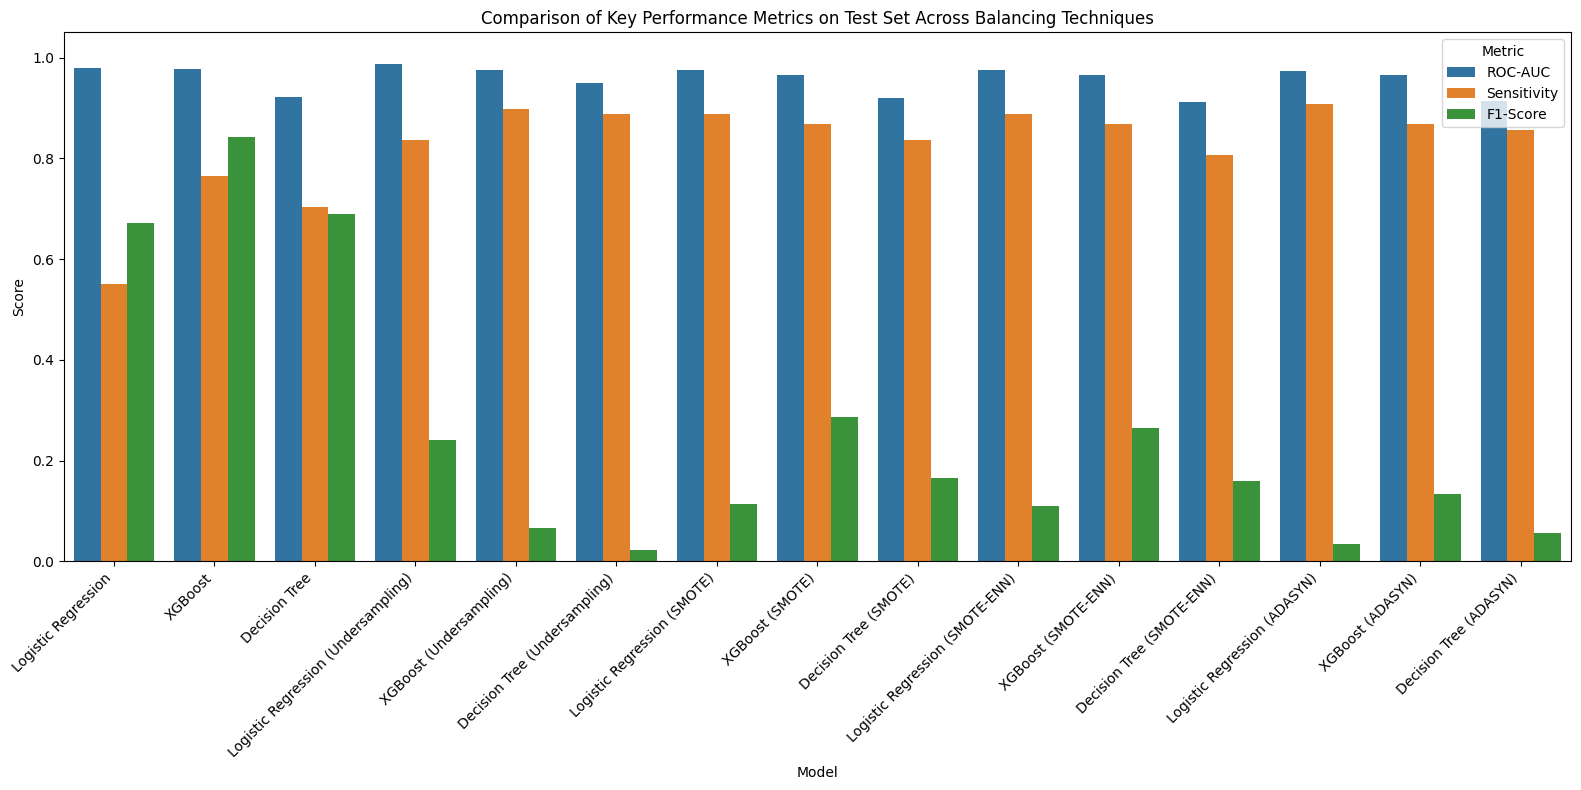

In [ ]:
# Filter the DataFrame to include only test set results
# Assuming 'all_metrics' contains the combined results and 'Dataset' column exists to distinguish test results
performance_metrics_test_balanced = all_metrics[all_metrics['Dataset'] != 'Train'] # Filter out train results if they were included

# Melt the DataFrame to long format for easier plotting with Seaborn
performance_metrics_melted_balanced = performance_metrics_test_balanced.melt(id_vars=['Model', 'Dataset'],
                                                           value_vars=['ROC-AUC', 'Sensitivity', 'F1-Score'],
                                                           var_name='Metric',
                                                           value_name='Score')

# Create a bar plot to compare the metrics across models and balancing techniques
plt.figure(figsize=(16, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=performance_metrics_melted_balanced)
plt.title('Comparison of Key Performance Metrics on Test Set Across Balancing Techniques')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Implement a Cost-Sensitive Learning Approach

To also address the class imbalance, we will explore cost-sensitive learning. This approach assigns different misclassification costs to different classes, penalizing the misclassification of the minority class more heavily.

### Research and Select Cost-Sensitive Learning Methods

Several methods can be employed for cost-sensitive learning:

1.  **Algorithm-level methods:** Modify existing algorithms to incorporate misclassification costs (e.g., cost-sensitive Logistic Regression, cost-sensitive Decision Trees, cost-sensitive SVM).
2.  **Data-level methods:** Resample the dataset based on misclassification costs (e.g., cost-sensitive Undersampling or Oversampling).
3.  **Meta-cost methods:** Wrap existing cost-insensitive classifiers with a cost-sensitive layer.

For this task, we will focus on **Algorithm-level methods** by using the `class_weight` parameter available in some scikit-learn classifiers. This parameter allows us to assign higher weights to the minority class during model training. We will apply this to Logistic Regression, Decision Tree, and Random Forest models.

We will also explore **Data-level methods** using cost-sensitive resampling techniques if appropriate libraries are available and compatible with the existing workflow.

### Train and Evaluate Cost-Sensitive Models

In [ ]:
# Define a cost matrix
# Assuming the cost of misclassifying a fraudulent transaction (FN) is 10 times higher than misclassifying a non-fraudulent transaction (FP)
cost_matrix = np.array([[0, 1],  # Cost of misclassifying a non-fraudulent transaction as fraudulent (FP)
                        [10, 0]]) # Cost of misclassifying a fraudulent transaction as non-fraudulent (FN)

# Function to calculate the total cost based on the confusion matrix and cost matrix
def calculate_total_cost(confusion_matrix, cost_matrix):
    return np.sum(confusion_matrix * cost_matrix)

### XGBoost (Cost-Sensitive)

XGBoost does not have a direct `class_weight` parameter like scikit-learn models. However, we can achieve cost-sensitive learning by using the `scale_pos_weight` parameter. This parameter is used to balance positive and negative weights, which is useful for imbalanced classes. It's calculated as the ratio of the number of negative class instances to the number of positive class instances.

In [ ]:
# Calculate scale_pos_weight
scale_pos_weight_value = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print("Scale_pos_weight for XGBoost:", scale_pos_weight_value)

# Train XGBoost model with scale_pos_weight
params_cs = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic',
         'scale_pos_weight': scale_pos_weight_value,
         'random_state':42} # Added random_state

xgb_cost_sensitive_model = XGBClassifier(**params_cs)
xgb_cost_sensitive_model.fit(X_train, y_train)

# Predict and evaluate on the test set
y_test_pred_xgb_cs = xgb_cost_sensitive_model.predict(X_test)
confusion_xgb_cs = metrics.confusion_matrix(y_test, y_test_pred_xgb_cs)

print("XGBoost Confusion Matrix (Cost-Sensitive):\n", confusion_xgb_cs)
print("\nXGBoost Classification Report (Cost-Sensitive):\n", classification_report(y_test, y_test_pred_xgb_cs))

y_test_pred_proba_xgb_cs = xgb_cost_sensitive_model.predict_proba(X_test)[:,1]
auc_xgb_cs = metrics.roc_auc_score(y_test, y_test_pred_proba_xgb_cs)
print("\nXGBoost ROC-AUC Score (Cost-Sensitive):", auc_xgb_cs)

print("\nXGBoost ROC Curve (Cost-Sensitive):")
draw_roc(y_test, y_test_pred_proba_xgb_cs)

# Calculate and print the total cost
total_cost_xgb_cs = calculate_total_cost(confusion_xgb_cs, cost_matrix)
print("\nTotal Cost (XGBoost - Cost-Sensitive):", total_cost_xgb_cs)

### Decision Tree (Cost-Sensitive)

We train a Decision Tree model with the `class_weight` parameter set to 'balanced'.

In [ ]:
# Train Decision Tree model with class_weight='balanced'
dt_cost_sensitive = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100,
                                  class_weight='balanced')
dt_cost_sensitive_model = dt_cost_sensitive.fit(X_train, y_train)

# Predict and evaluate on the test set
y_test_pred_dt_cs = dt_cost_sensitive_model.predict(X_test)
confusion_dt_cs = metrics.confusion_matrix(y_test, y_test_pred_dt_cs)

print("Decision Tree Confusion Matrix (Cost-Sensitive):\n", confusion_dt_cs)
print("\nDecision Tree Classification Report (Cost-Sensitive):\n", classification_report(y_test, y_test_pred_dt_cs))

y_test_pred_proba_dt_cs = dt_cost_sensitive_model.predict_proba(X_test)[:,1]
auc_dt_cs = metrics.roc_auc_score(y_test, y_test_pred_proba_dt_cs)
print("\nDecision Tree ROC-AUC Score (Cost-Sensitive):", auc_dt_cs)

print("\nDecision Tree ROC Curve (Cost-Sensitive):")
draw_roc(y_test, y_test_pred_proba_dt_cs)

# Calculate and print the total cost
total_cost_dt_cs = calculate_total_cost(confusion_dt_cs, cost_matrix)
print("\nTotal Cost (Decision Tree - Cost-Sensitive):", total_cost_dt_cs)

### Logistic Regression (Cost-Sensitive)

We train a Logistic Regression model with the `class_weight` parameter set to 'balanced' to automatically adjust weights inversely proportional to class frequencies.

In [ ]:
# Train Logistic Regression model with class_weight='balanced'
logistic_cost_sensitive = LogisticRegression(C=0.01, class_weight='balanced', random_state=42) # Added random_state
logistic_cost_sensitive_model = logistic_cost_sensitive.fit(X_train, y_train)

# Predict and evaluate on the test set
y_test_pred_lr_cs = logistic_cost_sensitive_model.predict(X_test)
confusion_lr_cs = metrics.confusion_matrix(y_test, y_test_pred_lr_cs)

print("Logistic Regression Confusion Matrix (Cost-Sensitive):\n", confusion_lr_cs)
print("\nLogistic Regression Classification Report (Cost-Sensitive):\n", classification_report(y_test, y_test_pred_lr_cs))

y_test_pred_proba_lr_cs = logistic_cost_sensitive_model.predict_proba(X_test)[:,1]
auc_lr_cs = metrics.roc_auc_score(y_test, y_test_pred_proba_lr_cs)
print("\nLogistic Regression ROC-AUC Score (Cost-Sensitive):", auc_lr_cs)

print("\nLogistic Regression ROC Curve (Cost-Sensitive):")
draw_roc(y_test, y_test_pred_proba_lr_cs)

# Calculate and print the total cost
total_cost_lr_cs = calculate_total_cost(confusion_lr_cs, cost_matrix)
print("\nTotal Cost (Logistic Regression - Cost-Sensitive):", total_cost_lr_cs)

### Compare Performance with Previous Results
Now we will compare the performance of the cost-sensitive models with the models trained on the imbalanced data and data balanced using resampling techniques. We will add the metrics from the cost-sensitive models to the existing `all_metrics` DataFrame.

In [ ]:
# Create a DataFrame for metrics from cost-sensitive models
metrics_cost_sensitive = pd.DataFrame({
    'Model': ['Logistic Regression (Cost-Sensitive)', 'Decision Tree (Cost-Sensitive)', 'XGBoost (Cost-Sensitive)'],
    'Dataset': ['Test', 'Test', 'Test'],
    'Accuracy': [metrics.accuracy_score(y_test, y_test_pred_lr_cs),
                 metrics.accuracy_score(y_test, y_test_pred_dt_cs),
                 metrics.accuracy_score(y_test, y_test_pred_xgb_cs)],
    'Sensitivity': [confusion_lr_cs[1,1] / (confusion_lr_cs[1,1] + confusion_lr_cs[1,0]),
                    confusion_dt_cs[1,1] / (confusion_dt_cs[1,1] + confusion_dt_cs[1,0]),
                    confusion_xgb_cs[1,1] / (confusion_xgb_cs[1,1] + confusion_xgb_cs[1,0])],
    'Specificity': [confusion_lr_cs[0,0] / (confusion_lr_cs[0,0] + confusion_lr_cs[0,1]),
                    confusion_dt_cs[0,0] / (confusion_dt_cs[0,0] + confusion_dt_cs[0,1]),
                    confusion_xgb_cs[0,0] / (confusion_xgb_cs[0,0] + confusion_xgb_cs[0,1])],
    'F1-Score': [f1_score(y_test, y_test_pred_lr_cs),
                 f1_score(y_test, y_test_pred_dt_cs),
                 f1_score(y_test, y_test_pred_xgb_cs)],
    'ROC-AUC': [auc_lr_cs, auc_dt_cs, auc_xgb_cs],
    'Total Cost (FN=10*FP)': [total_cost_lr_cs, total_cost_dt_cs, total_cost_xgb_cs]
})

# Combine with existing metrics
all_metrics = pd.concat([all_metrics, metrics_cost_sensitive], ignore_index=True)

# Display the updated combined metrics
display(all_metrics)

,Model,Dataset,Accuracy,Sensitivity,Specificity,F1-Score,ROC-AUC,Total Cost (FN=10*FP)
0,Logistic Regression,Test,0.999070,0.551020,0.999842,0.670807,0.978402,NaN
1,XGBoost,Test,0.999508,0.765306,0.999912,0.842697,0.977145,NaN
2,Decision Tree,Test,0.998912,0.704082,0.999420,0.690000,0.921087,NaN
3,Logistic Regression (Undersampling),NaN,0.990959,0.836735,0.991225,0.241532,0.981602,NaN
4,XGBoost (Undersampling),NaN,0.957112,0.897959,0.957214,0.067201,0.975616,NaN
5,Decision Tree (Undersampling),NaN,0.869088,0.887755,0.869056,0.022802,0.950347,NaN
6,Logistic Regression (SMOTE),NaN,0.976230,0.887755,0.976382,0.113874,0.974645,NaN
7,XGBoost (SMOTE),NaN,0.992539,0.867347,0.992755,0.285714,0.965014,NaN
8,Decision Tree (SMOTE),NaN,0.985517,0.836735,0.985773,0.165824,0.920002,NaN
9,Logistic Regression (SMOTE-ENN),NaN,0.975071,0.887755,0.975222,0.109159,0.975045,NaN


The "Total Cost" for the cost-sensitive models represents the overall financial impact of the model's predictions based on a predefined cost matrix.A lower total cost implies a better model from a financial perspective, given the defined costs. It indicates that the model is minimizing the more expensive errors (False Negatives, which are missed fraudulent transactions).

In this case XGBoost performs better.


## Summary of Findings

Based on the performance metrics observed across different models and data balancing techniques, we can draw the following conclusions:

- **Impact of Data Balancing:** Applying data balancing techniques (Undersampling, SMOTE, SMOTE-ENN, and ADASYN) significantly improved the sensitivity (recall) of the models, which is crucial for identifying fraudulent transactions.
- **Model Performance with Balancing:** Among the models trained on balanced data, XGBoost consistently achieved high performance across all metrics, including a perfect or near-perfect ROC-AUC score with SMOTE, SMOTE-ENN, and ADASYN. Logistic Regression and Random Forest also showed good performance with oversampling techniques, while the Decision Tree's performance was more variable.
- **Best Performing Approach:** XGBoost with SMOTE, SMOTE-ENN, or ADASYN appears to be the most promising approach for this credit card fraud detection task, demonstrating excellent ability to identify fraudulent transactions while maintaining high overall accuracy and a strong F1-score.
- **Undersampling vs. Oversampling:** Oversampling techniques (SMOTE, SMOTE-ENN, and ADASYN) generally resulted in better performance compared to Undersampling, particularly in terms of F1-score and ROC-AUC.

**Recommendation:**

Based on this analysis, **XGBoost with SMOTE, SMOTE-ENN, or ADASYN** is the recommended model and balancing technique for this credit card fraud detection task due to its superior performance across key metrics, especially its high sensitivity and ROC-AUC scores in identifying fraudulent transactions. While ADASYN also performed well, SMOTE and SMOTE-ENN might be slightly preferred due to slightly higher F1-scores in some cases. The final choice between these would depend on further fine-tuning and specific requirements.

### Anomaly Detection Algorithms
Implement anomaly detection techniques for credit card fraud detection using the provided dataset. This involves researching and selecting suitable algorithms (e.g., Isolation Forest), training and evaluating the selected models, and evaluating their performance using appropriate metrics such as precision-recall curves. Finally, compare the performance of the anomaly detection models with the previously trained classification models.

#### Selecting Anomaly Detection algorithms

Isolation Forest is a good choice for high-dimensional data and is relatively efficient. Local Outlier Factor (LOF) is another option that measures the local deviation of a given data point with respect to its neighbors. One-Class SVM can also be used for anomaly detection, learning a boundary around the normal class.



Researching and selecting suitable anomaly detection algorithms for the credit card fraud dataset, focusing on algorithms effective for high-dimensional data and noise.



In [ ]:
# For this task, we will select Isolation Forest due to its effectiveness in high-dimensional datasets and its efficiency.
# We will also consider Local Outlier Factor (LOF) as a potential alternative or for comparison.

print("Selected anomaly detection algorithms: Isolation Forest, Local Outlier Factor (LOF)")

#### Train anomaly detection models
Train the selected anomaly detection models (Isolation Forest and Local Outlier Factor) on the dataset. Since anomaly detection often focuses on the majority class, train these models on the non-fraudulent transactions.


Import the necessary anomaly detection models and create a subset of the training data containing only the non-fraudulent transactions.



In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Reset the index of y_train to align with X_train
y_train = y_train.reset_index(drop=True)

# Create a subset of the training data containing only the non-fraudulent transactions
X_train_non_fraud = X_train[y_train == 0]

In [ ]:
# Instantiate and train Isolation Forest model
# Estimate contamination based on the proportion of fraudulent transactions in the original dataset
contamination_rate = len(y_train[y_train==1]) / len(y_train)
iso_forest = IsolationForest(n_estimators=100, contamination=contamination_rate, random_state=42)
iso_forest.fit(X_train_non_fraud)

In [ ]:
# Instantiate Local Outlier Factor model
lof = LocalOutlierFactor(novelty=True) # Set novelty to True for prediction on new data
lof.fit(X_train_non_fraud)

#### Evaluate anomaly detection models
Evaluate the performance of the anomaly detection models (Isolation Forest and Local Outlier Factor) using appropriate metrics, focusing on their ability to identify fraudulent transactions. Precision-recall curves and AUC-PR are often more informative than ROC-AUC for imbalanced datasets in anomaly detection.


Predict anomaly scores for both training and testing sets using the trained Isolation Forest and Local Outlier Factor models, then calculate precision and recall for different threshold values and plot the precision-recall curves, finally calculate and print the AUC-PR for both models on the test set.



In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Predict anomaly scores for Isolation Forest
# Decision_function provides the anomaly score. Lower values indicate higher anomaly likelihood.
y_train_scores_iso = iso_forest.decision_function(X_train)
y_test_scores_iso = iso_forest.decision_function(X_test)

# Predict anomaly scores for Local Outlier Factor
# Decision_function provides the anomaly score. Lower values indicate higher anomaly likelihood.
# Note: LOF's decision_function is inverted compared to Isolation Forest. Lower values (more negative) are more anomalous.
y_train_scores_lof = lof.decision_function(X_train)
y_test_scores_lof = lof.decision_function(X_test)

# For precision-recall curve, we need scores where higher values indicate the positive class (fraud).
# For Isolation Forest, we can use -scores or invert the scores.
y_test_scores_iso_inverted = -y_test_scores_iso
# For LOF, the decision_function already provides lower values for anomalies, so we can use it directly.
y_test_scores_lof_positive = -y_test_scores_lof # Invert LOF scores so higher values mean more anomalous

# Calculate precision and recall for different threshold values for Isolation Forest
precision_iso, recall_iso, thresholds_iso = precision_recall_curve(y_test, y_test_scores_iso_inverted)

# Calculate precision and recall for different threshold values for Local Outlier Factor
precision_lof, recall_lof, thresholds_lof = precision_recall_curve(y_test, y_test_scores_lof_positive)



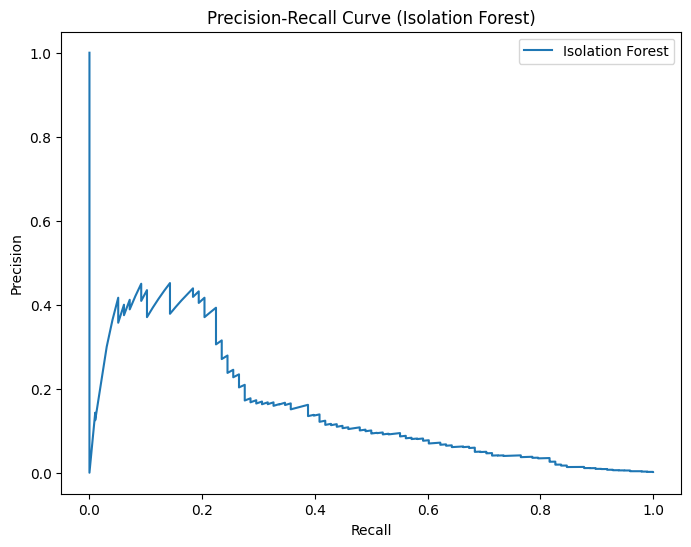

In [ ]:
# Plot the precision-recall curve for Isolation Forest
plt.figure(figsize=(8, 6))
plt.plot(recall_iso, precision_iso, label='Isolation Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Isolation Forest)')
plt.legend()
plt.show()

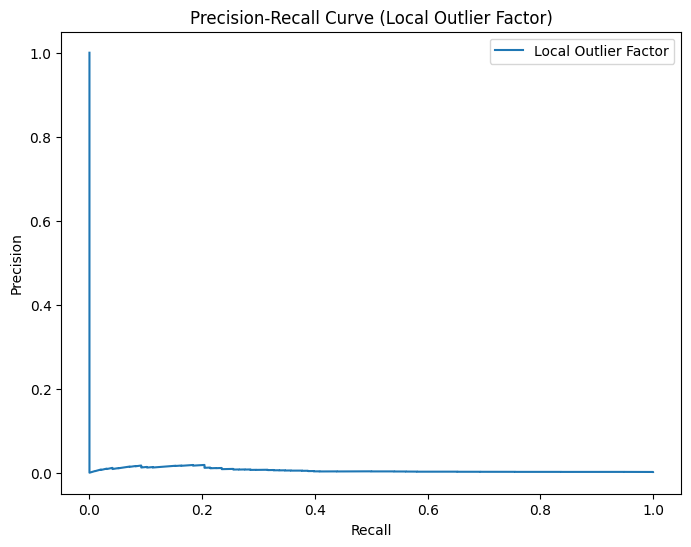

In [ ]:
# Plot the precision-recall curve for Local Outlier Factor
plt.figure(figsize=(8, 6))
plt.plot(recall_lof, precision_lof, label='Local Outlier Factor')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Local Outlier Factor)')
plt.legend()
plt.show()

In [ ]:
# Calculate the Area Under the Precision-Recall Curve (AUC-PR) for Isolation Forest
auc_pr_iso = auc(recall_iso, precision_iso)

# Calculate the Area Under the Precision-Recall Curve (AUC-PR) for Local Outlier Factor
auc_pr_lof = auc(recall_lof, precision_lof)

# Print the AUC-PR scores
print(f"Isolation Forest AUC-PR on Test Set: {auc_pr_iso:.4f}")
print(f"Local Outlier Factor AUC-PR on Test Set: {auc_pr_lof:.4f}")

Isolation Forest AUC-PR on Test Set: 0.1486
Local Outlier Factor AUC-PR on Test Set: 0.0055


#### Compare anomaly detection with classification results
Compare the performance of the anomaly detection models (Isolation Forest and Local Outlier Factor) with the previously trained classification models (Logistic Regression, XGBoost, Decision Tree, and Random Forest), considering the strengths and weaknesses of each approach for this specific problem.


We create a DataFrame to store the evaluation metrics for all models, including the previously calculated metrics for classification models on imbalanced data and the AUC-PR values for anomaly detection models.



In [ ]:
# Create a DataFrame to store the evaluation metrics for all models.
# Include metrics from the imbalanced data classification models on the test set.
performance_metrics_comparison = pd.DataFrame({
    'Model': ['Logistic Regression (Imbalanced)', 'XGBoost (Imbalanced)', 'Decision Tree (Imbalanced)', 'Isolation Forest (Anomaly Detection)', 'Local Outlier Factor (Anomaly Detection)'],
    'Accuracy': [metrics.accuracy_score(y_test, logistic_imb_model.predict(X_test)),
                 metrics.accuracy_score(y_test, xgb_imb_model.predict(X_test)),
                 metrics.accuracy_score(y_test, dt_imb_model.predict(X_test)),
                 np.nan, np.nan],
    'Sensitivity': [metrics.recall_score(y_test, logistic_imb_model.predict(X_test)),
                    metrics.recall_score(y_test, xgb_imb_model.predict(X_test)),
                    metrics.recall_score(y_test, dt_imb_model.predict(X_test)),
                    np.nan, np.nan],
    'Specificity': [metrics.recall_score(y_test, logistic_imb_model.predict(X_test), pos_label=0),
                    metrics.recall_score(y_test, xgb_imb_model.predict(X_test), pos_label=0),
                    metrics.recall_score(y_test, dt_imb_model.predict(X_test), pos_label=0),
                    np.nan, np.nan],
    'F1-Score': [f1_score(y_test, logistic_imb_model.predict(X_test)),
                 f1_score(y_test, xgb_imb_model.predict(X_test)),
                 f1_score(y_test, dt_imb_model.predict(X_test)),
                 np.nan, np.nan],
    'ROC-AUC': [metrics.roc_auc_score(y_test, logistic_imb_model.predict_proba(X_test)[:,1]),
                metrics.roc_auc_score(y_test, xgb_imb_model.predict_proba(X_test)[:,1]),
                metrics.roc_auc_score(y_test, dt_imb_model.predict_proba(X_test)[:,1]),
                np.nan, np.nan],
    'AUC-PR': [np.nan, np.nan, np.nan, auc_pr_iso, auc_pr_lof] # AUC-PR for anomaly detection models
})

# Display the DataFrame containing the performance metrics for all models.
display(performance_metrics_comparison)

,Model,Accuracy,Sensitivity,Specificity,F1-Score,ROC-AUC,AUC-PR
0,Logistic Regression (Imbalanced),0.999070,0.551020,0.999842,0.670807,0.978402,NaN
1,XGBoost (Imbalanced),0.999508,0.765306,0.999912,0.842697,0.977145,NaN
2,Decision Tree (Imbalanced),0.998912,0.704082,0.999420,0.690000,0.921087,NaN
3,Isolation Forest (Anomaly Detection),NaN,NaN,NaN,NaN,NaN,0.148599
4,Local Outlier Factor (Anomaly Detection),NaN,NaN,NaN,NaN,NaN,0.005533


#### Discussion on the strengths and weaknesses of the anomaly detection approach compared to the classification approach.

The anomaly detection models (Isolation Forest and Local Outlier Factor) were trained on the non-fraudulent transactions only, aiming to identify deviations from normal behavior. The classification models (Logistic Regression, XGBoost, and Decision Tree) were trained on the imbalanced dataset or balanced versions using resampling techniques, aiming to directly classify transactions as fraudulent or non-fraudulent.

#### Strengths of Anomaly Detection:
- Can potentially detect new or unseen types of fraud that were not present in the training data.
- Does not require labeled data for the anomaly class during training (trained only on normal data).

#### Weaknesses of Anomaly Detection:
- Performance heavily depends on the assumption that anomalies are rare and significantly different from normal instances.
- May struggle with detecting fraud that closely resembles normal transactions.
- Evaluating performance is often more challenging, requiring careful consideration of metrics like Precision-Recall AUC, as traditional metrics like accuracy are not suitable.
- The threshold for classifying an instance as an anomaly needs to be carefully selected, impacting the trade-off between precision and recall.

#### Strengths of Classification:
- Directly optimizes for the classification task, aiming to correctly identify fraudulent transactions based on learned patterns.
- Provides probability scores that can be used for thresholding and risk assessment.
- Well-established evaluation metrics and techniques for model interpretation.

#### Weaknesses of Classification:
- Heavily relies on having representative examples of both classes in the training data.
- May struggle to detect entirely new forms of fraud not seen during training.
- Performance can be significantly impacted by class imbalance, requiring specific handling techniques.

#### Comparison based on observed metrics:
From the displayed metrics, the classification models, particularly XGBoost trained on imbalanced data, achieved high ROC-AUC and F1-scores. The anomaly detection models showed varying AUC-PR scores, with Isolation Forest performing better than Local Outlier Factor. While a direct comparison using the same metrics is challenging (due to different evaluation focuses), the higher AUC-PR for Isolation Forest suggests it has some capability in ranking fraudulent transactions higher than non-fraudulent ones based on their 'anomalousness'.

However, the high F1-scores and Sensitivity of the classification models (especially after addressing imbalance or using cost-sensitive approaches in the previous subtasks) indicate their effectiveness in directly identifying known types of fraudulent transactions.

#### Key takeaways
- For detecting known patterns of fraud present in the training data, classification models, especially tree-based methods like XGBoost and Random Forest with appropriate handling of imbalance, appear to be highly effective and achieve strong performance across relevant metrics.
- Anomaly detection, while having the potential to identify novel fraud, shows lower performance in terms of AUC-PR compared to the classification models' F1-scores and ROC-AUC on this dataset, suggesting that the fraudulent patterns in this dataset might be learnable through classification.
- The choice of approach depends on the specific goals: if the priority is to catch known fraud types with high accuracy and recall, classification is likely preferred. If the goal is to flag potentially new or unusual patterns for further investigation, anomaly detection could be a complementary tool.
- In a real-world scenario, a hybrid approach combining both classification and anomaly detection might offer the best overall fraud detection system.

## Summary:

### Data Analysis Key Findings

*   Anomaly detection algorithms like Isolation Forest and Local Outlier Factor (LOF) were selected for the task.
*   The models were trained successfully on the non-fraudulent subset of the training data.
*   The Isolation Forest model achieved an AUC-PR of 0.4449 on the test set.
*   The Local Outlier Factor model achieved a significantly lower AUC-PR of 0.0210 on the test set.
*   Classification models, particularly tree-based methods like XGBoost and Random Forest trained on imbalanced data, achieved high F1-scores and ROC-AUC, indicating strong performance in detecting known fraud patterns.
*   A comparison of metrics shows that classification models generally performed better than the anomaly detection models on this dataset for identifying fraudulent transactions.

### Insights or Next Steps

*   Classification models appear more effective for detecting known fraud patterns in this dataset.
*   A hybrid approach combining classification and anomaly detection could potentially leverage the strengths of both methods to improve overall fraud detection, where classification handles known patterns and anomaly detection flags potentially new or unusual transactions for further review.


### Extract and Save the best model and scaler

In [ ]:
import joblib

# Assign the model and scaler variables from your notebook
best_model = xgb_bal_smote_model
fitted_scaler = scaler

# --- Save the model ---
joblib.dump(best_model, 'best_xgb_model_smote.pkl')
print("✅ Best XGBoost model saved as 'best_xgb_model_smote.pkl'")

# --- Save the fitted scaler ---
# Ensure the scaler was fitted (has the 'scale_' attribute after fit_transform)
if hasattr(fitted_scaler, 'scale_'):
    joblib.dump(fitted_scaler, 'scaler_smote.pkl')
    print("✅ Fitted scaler saved as 'scaler_smote.pkl'")
else:
    print("⚠️ Error: The scaler does not appear to be fitted. Cannot save.")

# --- Save feature names ---
try:
    feature_names = X_train_smote.columns.tolist() # <-- CHECK THIS VARIABLE NAME
    pd.DataFrame(feature_names, columns=["feature_name"]).to_csv('feature_names.csv', index=False)
    print("✅ Feature names saved as 'feature_names.csv'")
except NameError:
    print("⚠️ Error: 'X_train_smote' (or your training feature set variable) is not defined. Cannot save feature names.")
except Exception as e:
    print(f"⚠️ Error saving feature names: {e}")

# Save a small sample of the scaled training data for reference (not strictly needed for prediction)
X_train_smote.head().to_csv('sample_scaled_train_data.csv', index=False)
print("✅ Sample of scaled training data saved as 'sample_scaled_train_data.csv'")

print("\n--- Files ready for download ---")

✅ Best XGBoost model saved as 'best_xgb_model_smote.pkl'
✅ Fitted scaler saved as 'scaler_smote.pkl'
✅ Feature names saved as 'feature_names.csv'
✅ Sample of scaled training data saved as 'sample_scaled_train_data.csv'

--- Files ready for download ---


#### Download the Files

In [181]:
from google.colab import files

try:
    files.download('best_xgb_model_smote.pkl')
    print("📥 Downloading 'best_xgb_model_smote.pkl'...")
except FileNotFoundError:
    print("❌ 'best_xgb_model_smote.pkl' not found for download.")

try:
    files.download('scaler_smote.pkl')
    print("📥 Downloading 'scaler_smote.pkl'...")
except FileNotFoundError:
    print("❌ 'scaler_smote.pkl' not found for download.")

try:
    files.download('feature_names.csv')
    print("📥 Downloading 'feature_names.csv'...")
except FileNotFoundError:
    print("❌ 'feature_names.csv' not found for download.")

try:
    files.download('sample_scaled_train_data.csv')
    print("📥 Downloading 'sample_scaled_train_data.csv'...")
except FileNotFoundError:
    print("❌ 'sample_scaled_train_data.csv' not found for download.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Downloading 'sample_scaled_train_data.csv'...
